<a href="https://colab.research.google.com/github/sameerraj09/Capstone_Project/blob/main/clean_train_test_final_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Capstone Project**

In [ ]:
#data Loading
import pandas as pd

try:
    df = pd.read_excel('COMPLETE DATA.xlsx')
    display(df.head())
except FileNotFoundError:
    print("Error: 'COMPLETE DATA.xlsx' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,URL,URLLength,DomainLength,TLDLength,LetterRatioInURL,DigitRatioInURL,SpacialCharRatioInURL,LargestLineLength,NoOfImage,NoOfJS,...,HasFavicon,IsDomainIP,HasCopyrightInfo,RightClick,popUpWindow,Iframe,Abnormal_URL,Redirect,on_mouseover,Label
0,http://correct-45190ev.web.app,30,23,7,0.633333,0.166667,0.200000,18789,1,0,...,-1,-1,-1,-1,-1,-1,-1,0,-1,0
1,http://correctguy.com/acc/xls,29,14,3,0.793103,0.000000,0.206897,9851,1,0,...,1,-1,-1,-1,-1,-1,1,-1,-1,0
2,http://correctguy.com/file/smartsheet.com/file...,63,14,3,0.825397,0.000000,0.174603,9851,1,0,...,1,-1,-1,-1,-1,-1,1,-1,-1,0
3,http://correctingservicesalakks.pages.dev,41,34,9,0.878049,0.000000,0.121951,394,0,3,...,-1,-1,-1,-1,-1,-1,-1,0,-1,0
4,http://correo.alcontadores.mx,29,22,2,0.827586,0.000000,0.172414,85,0,0,...,-1,-1,-1,-1,-1,-1,-1,0,-1,0


In [ ]:
import numpy as np
print(np.__version__)

1.26.4


In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
!pip install autogluon

  Using cached autogluon-1.2-py3-none-any.whl.metadata (11 kB)
  Using cached autogluon.core-1.2-py3-none-any.whl.metadata (12 kB)
  Using cached autogluon.features-1.2-py3-none-any.whl.metadata (11 kB)
  Using cached autogluon.tabular-1.2-py3-none-any.whl.metadata (14 kB)
  Using cached autogluon.multimodal-1.2-py3-none-any.whl.metadata (12 kB)
  Using cached autogluon.timeseries-1.2-py3-none-any.whl.metadata (12 kB)
  Using cached boto3-1.37.30-py3-none-any.whl.metadata (6.7 kB)
  Using cached autogluon.common-1.2-py3-none-any.whl.metadata (11 kB)
  Using cached ray-2.39.0-cp311-cp311-manylinux2014_x86_64.whl.metadata (17 kB)
  Using cached torch-2.5.1-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached lightning-2.5.1-py3-none-any.whl.metadata (39 kB)
  Using cached accelerate-0.34.2-py3-none-any.whl.metadata (19 kB)
  Using cached jsonschema-4.21.1-py3-none-any.whl.metadata (7.8 kB)
  Using cached seqeval-1.2.2-py3-none-any.whl
  Using cached evaluate-0.4.3-py3-none-a

In [ ]:
# Check unique values in each column
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")


URL: 241538 unique values
URLLength: 674 unique values
DomainLength: 109 unique values
TLDLength: 33 unique values
LetterRatioInURL: 5294 unique values
DigitRatioInURL: 4986 unique values
SpacialCharRatioInURL: 3175 unique values
LargestLineLength: 38567 unique values
NoOfImage: 738 unique values
NoOfJS: 307 unique values
NoOfCSS: 167 unique values
NoOfSelfRef: 1602 unique values
NoOfExternalRef: 936 unique values
IsHTTPS: 2 unique values
HasObfuscation: 3 unique values
HasTitle: 3 unique values
HasDescription: 3 unique values
HasSubmitButton: 3 unique values
HasPasswordField: 3 unique values
HasSocialNet: 3 unique values
HasFavicon: 3 unique values
IsDomainIP: 2 unique values
HasCopyrightInfo: 3 unique values
RightClick: 3 unique values
popUpWindow: 3 unique values
Iframe: 3 unique values
Abnormal_URL: 2 unique values
Redirect: 3 unique values
on_mouseover: 3 unique values
Label: 2 unique values


In [ ]:
# Identify binary and ternary features by unique value counts
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
ternary_cols = [col for col in df.columns if df[col].nunique() == 3]

print("=== Binary Features and Their Value Counts ===")
for col in binary_cols:
    print(f"\n{col}:\n{df[col].value_counts()}")

print("\n\n=== Ternary Features and Their Value Counts ===")
for col in ternary_cols:
    print(f"\n{col}:\n{df[col].value_counts()}")


=== Binary Features and Their Value Counts ===

IsHTTPS:
IsHTTPS
 1    179817
-1     61866
Name: count, dtype: int64

IsDomainIP:
IsDomainIP
-1    240757
 1       926
Name: count, dtype: int64

Abnormal_URL:
Abnormal_URL
-1    150885
 1     90798
Name: count, dtype: int64

Label:
Label
1    133745
0    107938
Name: count, dtype: int64


=== Ternary Features and Their Value Counts ===

HasObfuscation:
HasObfuscation
 1    132301
-1    105792
 0      3590
Name: count, dtype: int64

HasTitle:
HasTitle
 1    215603
-1     26028
 0        52
Name: count, dtype: int64

HasDescription:
HasDescription
-1    145131
 1     96500
 0        52
Name: count, dtype: int64

HasSubmitButton:
HasSubmitButton
 1    124582
-1    117049
 0        52
Name: count, dtype: int64

HasPasswordField:
HasPasswordField
-1    228923
 1     12708
 0        52
Name: count, dtype: int64

HasSocialNet:
HasSocialNet
-1    141819
 1     99812
 0        52
Name: count, dtype: int64

HasFavicon:
HasFavicon
 1    143897
-1  

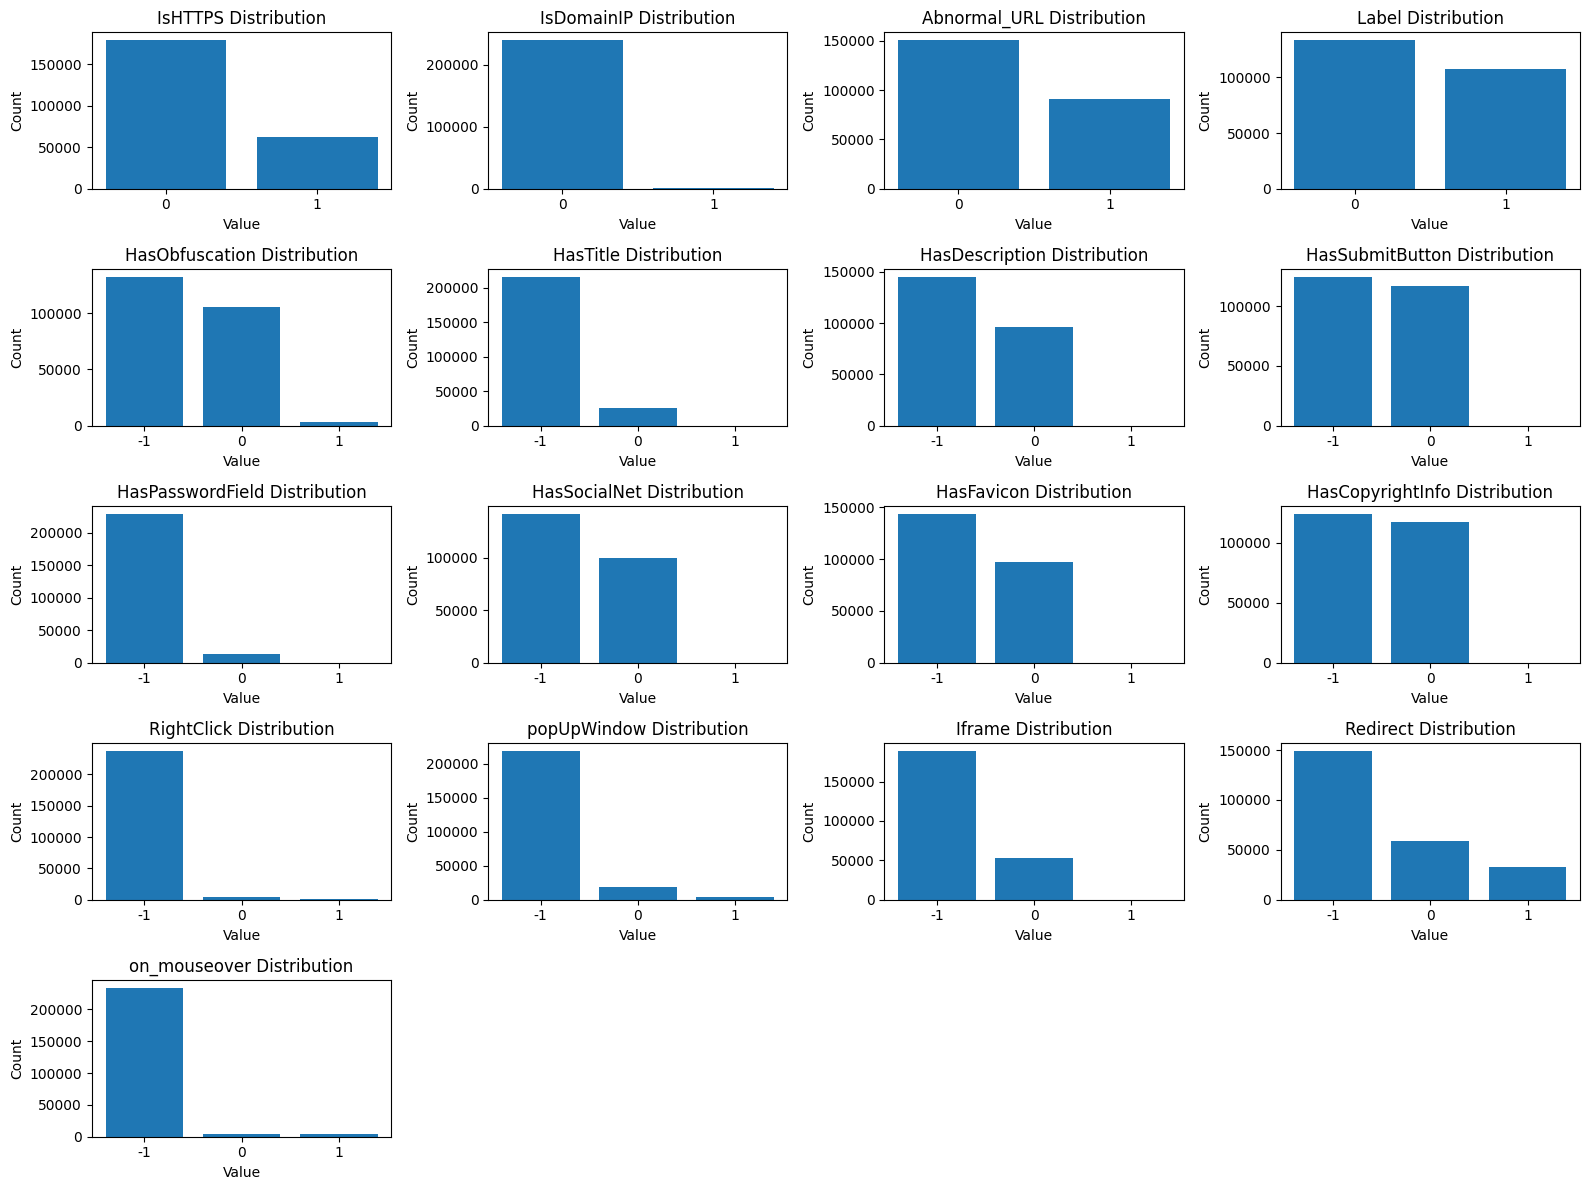

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Binary Features Data
binary_features = {
    'IsHTTPS': [179817, 61866],
    'IsDomainIP': [240757, 926],
    'Abnormal_URL': [150885, 90798],
    'Label': [133745, 107938],
}

# Ternary Feature Data
ternary_features = {
    'HasObfuscation': [132301, 105792, 3590],
    'HasTitle': [215603, 26028, 52],
    'HasDescription': [145131, 96500, 52],
    'HasSubmitButton': [124582, 117049, 52],
    'HasPasswordField': [228923, 12708, 52],
    'HasSocialNet': [141819, 99812, 52],
    'HasFavicon': [143897, 97734, 52],
    'HasCopyrightInfo': [124326, 117305, 52],
    'RightClick': [237727, 3590, 366],
    'popUpWindow': [219303, 18790, 3590],
    'Iframe': [189039, 52592, 52],
    'Redirect': [149354, 59039, 33290],
    'on_mouseover': [233858, 4235, 3590]
}

# Plot Binary Features
plt.figure(figsize=(16, 12))
for i, (feature, counts) in enumerate(binary_features.items(), 1):
    plt.subplot(5, 4, i)  # Increase grid size to accommodate more plots
    plt.bar([0, 1], counts, tick_label=['0', '1'])
    plt.title(f'{feature} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Count')

# Plot Ternary Features
for i, (feature, counts) in enumerate(ternary_features.items(), 1):
    plt.subplot(5, 4, len(binary_features) + i)  # Corrected to fit all subplots
    plt.bar([0, 1, 2], counts, tick_label=['-1', '0', '1'])
    plt.title(f'{feature} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Count')

# Adjust layout for a better view
plt.tight_layout()
plt.show()


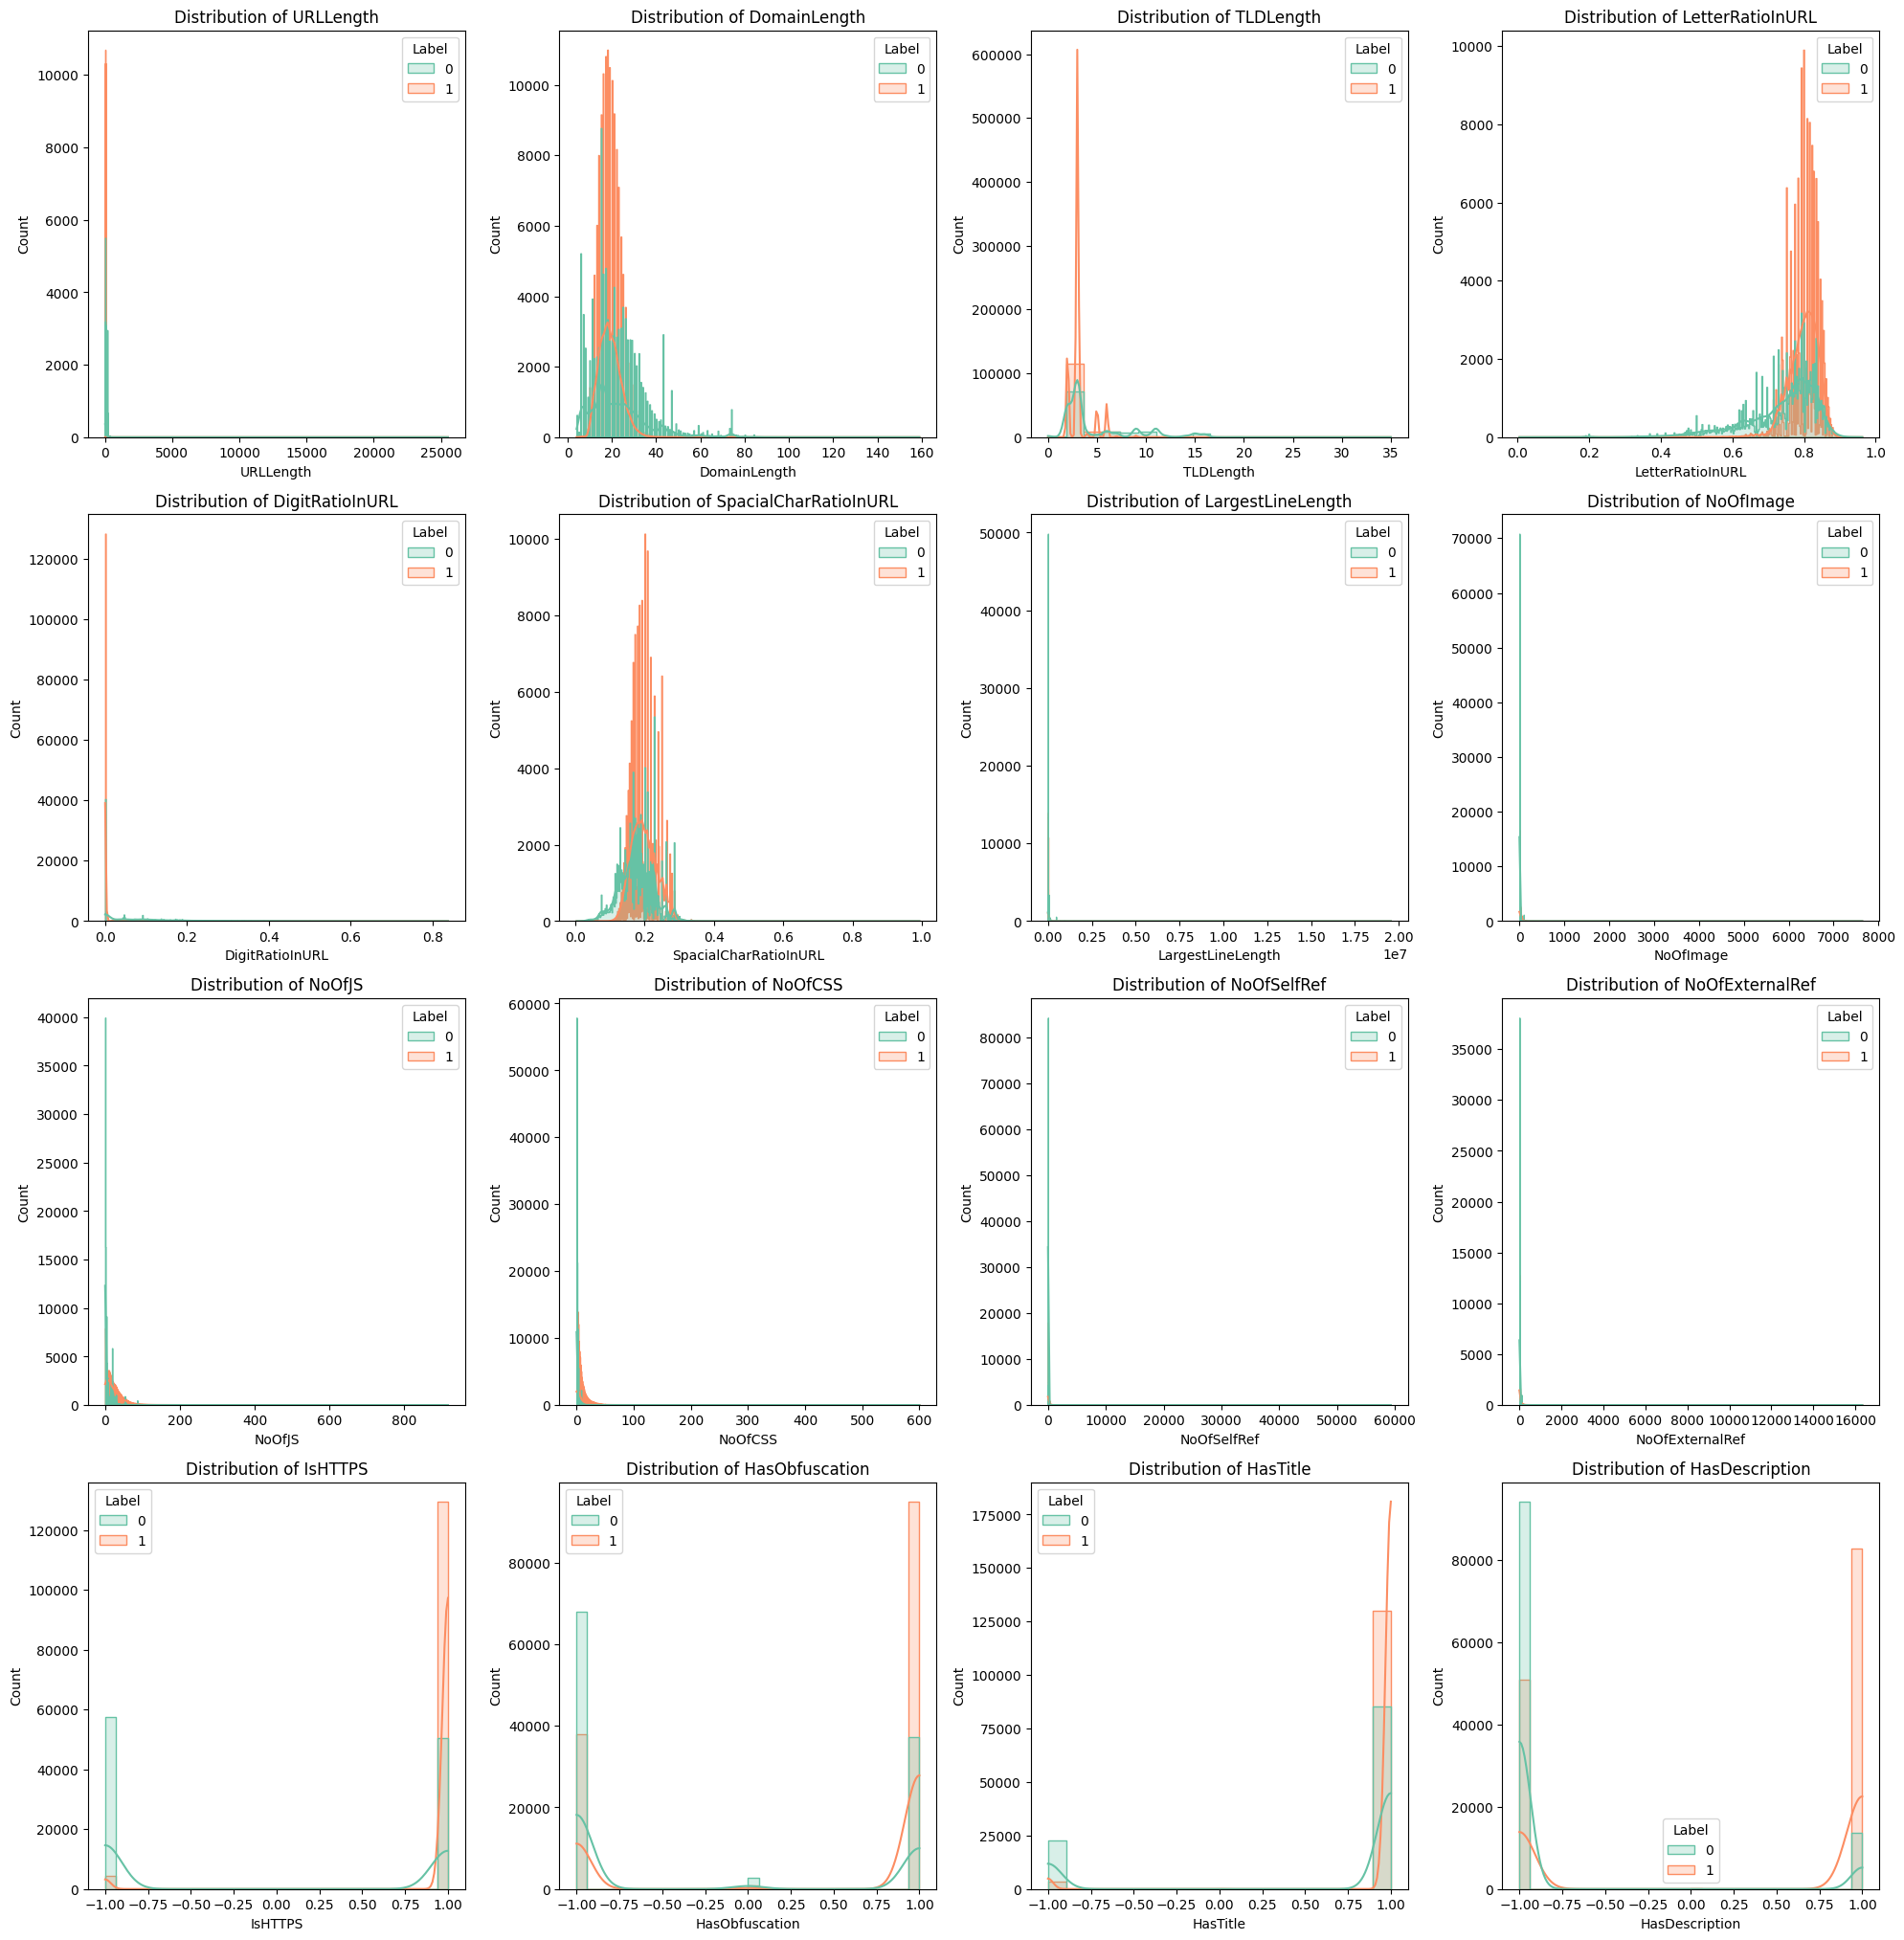

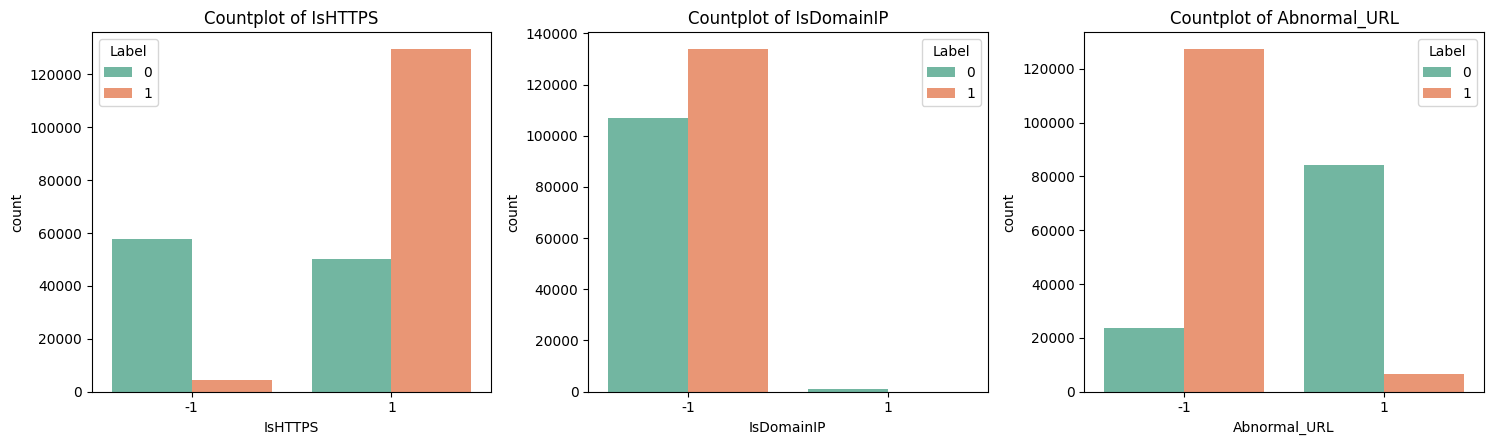

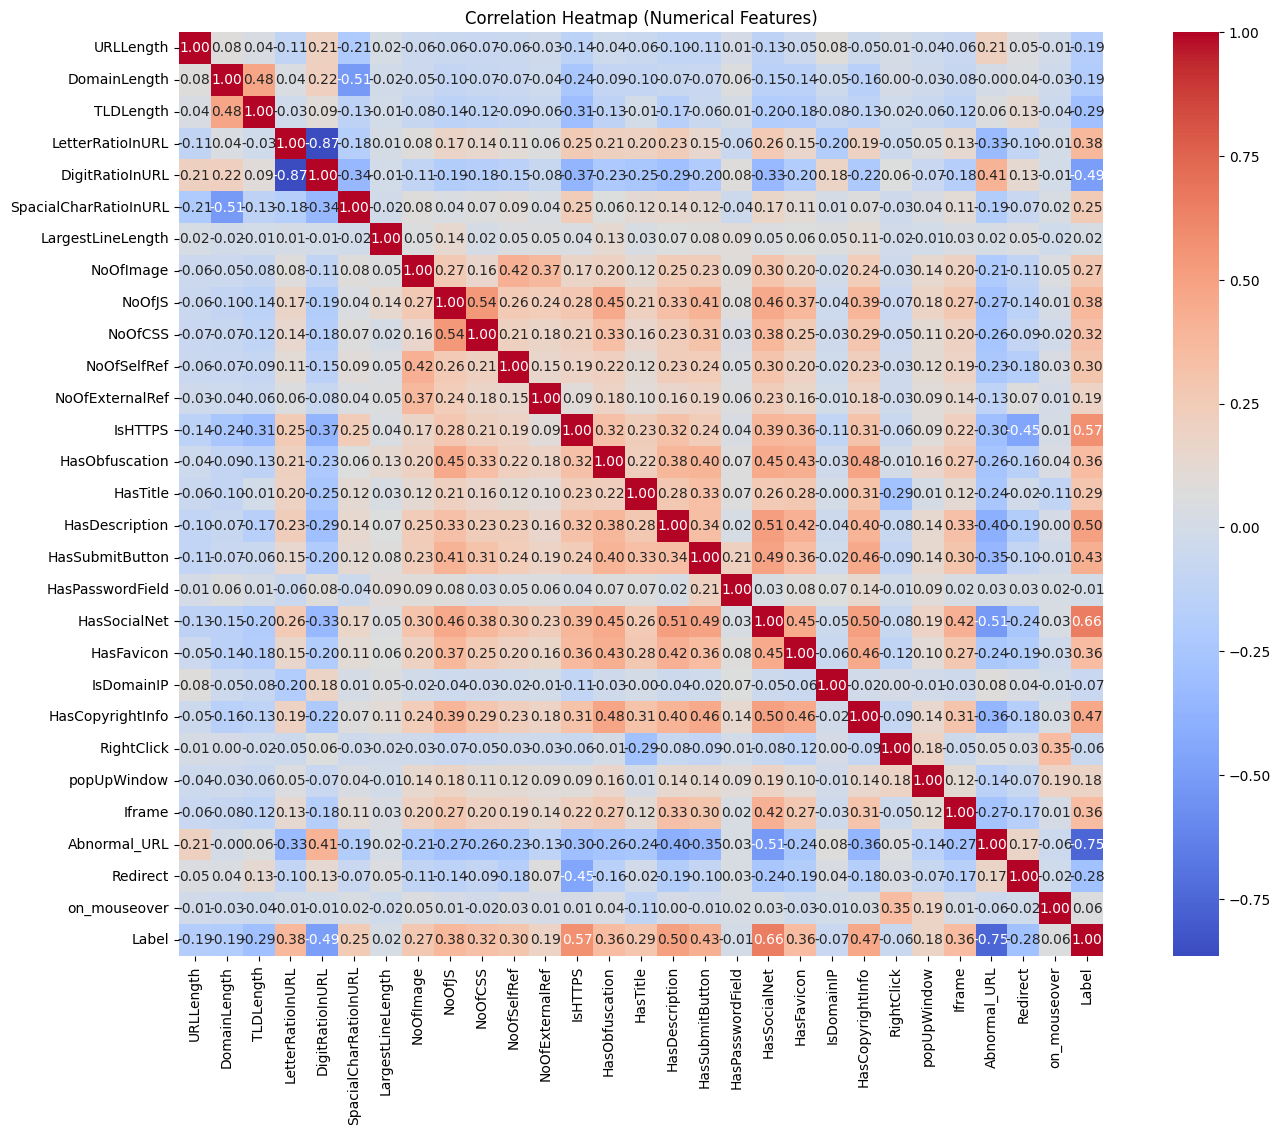

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate columns by type
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and col not in ['Label']]
ternary_cols = [col for col in df.columns if df[col].nunique() == 3]
target_col = 'Label'

# 1. Distribution plots for numerical features
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_cols[:16]):  # Adjust number if needed
    plt.subplot(5, 4, i+1)
    sns.histplot(data=df, x=col, kde=True, hue=target_col, element="step", palette="Set2")
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 2. Count plots for binary features
plt.figure(figsize=(20, 25))
for i, col in enumerate(binary_cols):
    plt.subplot(6, 4, i+1)
    sns.countplot(data=df, x=col, hue=target_col, palette="Set2")
    plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

# 3. Correlation heatmap for numeric features
plt.figure(figsize=(18, 12))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


In [ ]:
# 1. Check for null values
print("🔍 Checking for null values:\n")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

# 2. Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\n📑 Duplicate rows found: {duplicate_count}")

# 3. Remove duplicate rows (if any)
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"✅ Removed {duplicate_count} duplicate rows.")

# 4. Drop rows with null values (if any)
null_row_count = df.isnull().any(axis=1).sum()
if null_row_count > 0:
    df = df.dropna()
    print(f"✅ Dropped {null_row_count} rows with null values.")
else:
    print("✅ No null values found.")

# 5. Final shape
print(f"\n📏 Final dataset shape: {df.shape}")


🔍 Checking for null values:

Series([], dtype: int64)

📑 Duplicate rows found: 135
✅ Removed 135 duplicate rows.
✅ No null values found.

📏 Final dataset shape: (241548, 30)


✅ Number of phishing websites: 107843
⚠️ Number of legitimate websites: 133705


<ipython-input-17-18e492c4758b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='Set2')


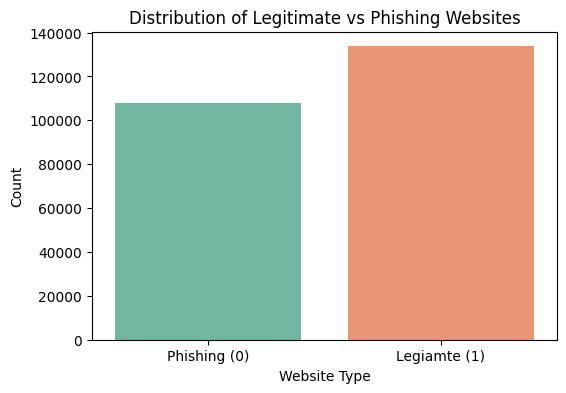

In [ ]:
# ✅ Count of legitimate and phishing websites after duplicates removed
legit_count = df[df['Label'] == 1].shape[0]
phishing_count = df[df['Label'] == 0].shape[0]

print(f"✅ Number of phishing websites: {legit_count}")
print(f"⚠️ Number of legitimate websites: {phishing_count}")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=df, palette='Set2')
plt.xticks([0, 1], ['Phishing (0)', 'Legiamte (1)'])
plt.title('Distribution of Legitimate vs Phishing Websites')
plt.xlabel('Website Type')
plt.ylabel('Count')
plt.show()


In [ ]:
df_cleaned = df.drop(columns=['IsDomainIP', 'RightClick', 'on_mouseover'])
# Step 1: Drop skewed/useless features
# Step 2: Drop rows where 'HasObfuscation' or 'popUpWindow' is 0 (rare)
df_cleaned = df_cleaned[
    (df_cleaned['HasObfuscation'] != 0) &
    (df_cleaned['popUpWindow'] != 0)
]

# Step 3: Convert -1 to 0, and keep 1 as 1 for these binary-like ternary features
df_cleaned['HasObfuscation'] = df_cleaned['HasObfuscation'].replace({-1: 0})
df_cleaned['popUpWindow'] = df_cleaned['popUpWindow'].replace({-1: 0})

# Step 4: Handle all other ternary features where 0 is rare (drop rows, convert -1 to 0)
rare_0_features = [
    'HasTitle', 'HasDescription', 'HasSubmitButton',
    'HasPasswordField', 'HasSocialNet', 'HasFavicon',
    'HasCopyrightInfo', 'Iframe'
]

# Drop rows where value is 0
for col in rare_0_features:
    df_cleaned = df_cleaned[df_cleaned[col] != 0]

# Convert -1 to 0, and keep 1 as 1
for col in rare_0_features:
    df_cleaned[col] = df_cleaned[col].replace({-1: 0})

# Step 5: ✅ Leave Redirect as-is (will one-hot encode later)
# Step 6: Final check
print("✅ Final cleaned shape:", df_cleaned.shape)
print("🎯 Target distribution:\n", df_cleaned['Label'].value_counts())


✅ Final cleaned shape: (237961, 27)
🎯 Target distribution:
 Label
1    132853
0    105108
Name: count, dtype: int64


In [ ]:
# Before dropping
original_shape = 250258  # As per your previous data shape after SMOTE
after_dropping_shape = 237958

dropped_rows = original_shape - after_dropping_shape
print("🚨 Rows dropped:", dropped_rows)
print("📉 Percentage of data lost: {:.2f}%".format((dropped_rows / original_shape) * 100))


🚨 Rows dropped: 12300
📉 Percentage of data lost: 4.91%


In [ ]:
# Identify binary and ternary features by unique value counts
binary_cols = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 2]
ternary_cols = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 3]

print("=== Binary Features and Their Value Counts ===")
for col in binary_cols:
    print(f"\n{col}:\n{df_cleaned[col].value_counts()}")

print("\n\n=== Ternary Features and Their Value Counts ===")
for col in ternary_cols:
    print(f"\n{col}:\n{df_cleaned[col].value_counts()}")


=== Binary Features and Their Value Counts ===

IsHTTPS:
IsHTTPS
 1    178140
-1     59821
Name: count, dtype: int64

HasObfuscation:
HasObfuscation
1    132247
0    105714
Name: count, dtype: int64

HasTitle:
HasTitle
1    215487
0     22474
Name: count, dtype: int64

HasDescription:
HasDescription
0    141497
1     96464
Name: count, dtype: int64

HasSubmitButton:
HasSubmitButton
1    124498
0    113463
Name: count, dtype: int64

HasPasswordField:
HasPasswordField
0    225280
1     12681
Name: count, dtype: int64

HasSocialNet:
HasSocialNet
0    138181
1     99780
Name: count, dtype: int64

HasFavicon:
HasFavicon
1    143826
0     94135
Name: count, dtype: int64

HasCopyrightInfo:
HasCopyrightInfo
0    120709
1    117252
Name: count, dtype: int64

popUpWindow:
popUpWindow
0    219178
1     18783
Name: count, dtype: int64

Iframe:
Iframe
0    185383
1     52578
Name: count, dtype: int64

Abnormal_URL:
Abnormal_URL
-1    149500
 1     88461
Name: count, dtype: int64

Label:
Label
1    

In [ ]:
# Check data types
data_types = df_cleaned.dtypes
print("Data Types:\n", data_types)

# Calculate unique value counts
unique_value_counts = df_cleaned.nunique()
print("\nUnique Value Counts:\n", unique_value_counts)

# Print unique values for each column
for column in df_cleaned.columns:
    print(f"\nUnique values for column '{column}':\n{df_cleaned[column].unique()}")

Data Types:
 URL                       object
URLLength                  int64
DomainLength               int64
TLDLength                  int64
LetterRatioInURL         float64
DigitRatioInURL          float64
SpacialCharRatioInURL    float64
LargestLineLength          int64
NoOfImage                  int64
NoOfJS                     int64
NoOfCSS                    int64
NoOfSelfRef                int64
NoOfExternalRef            int64
IsHTTPS                    int64
HasObfuscation             int64
HasTitle                   int64
HasDescription             int64
HasSubmitButton            int64
HasPasswordField           int64
HasSocialNet               int64
HasFavicon                 int64
HasCopyrightInfo           int64
popUpWindow                int64
Iframe                     int64
Abnormal_URL               int64
Redirect                   int64
Label                      int64
dtype: object

Unique Value Counts:
 URL                      237951
URLLength                  

=== Binary Feature Distributions ===


<ipython-input-22-a561710e682a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set2')


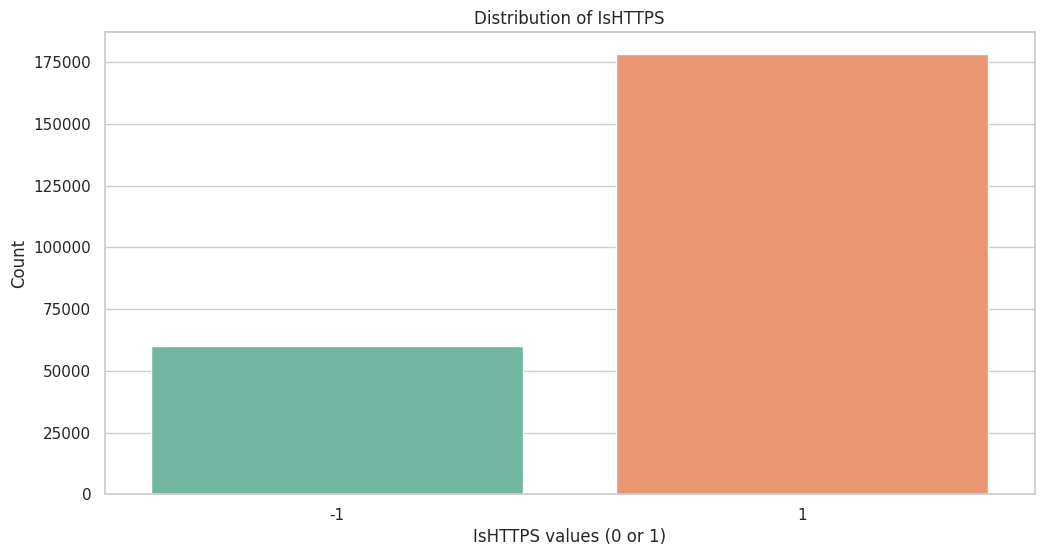

<ipython-input-22-a561710e682a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set2')


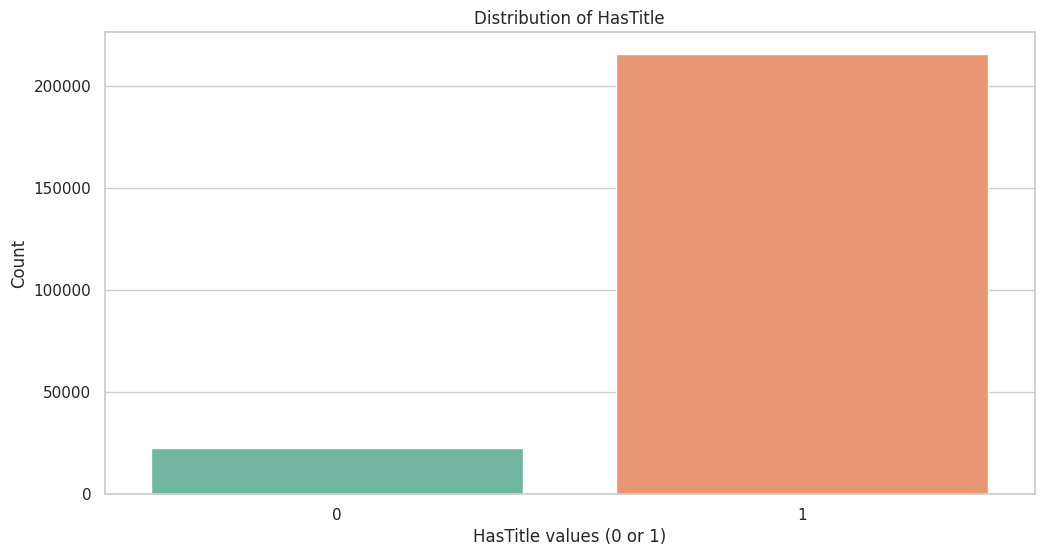

<ipython-input-22-a561710e682a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set2')


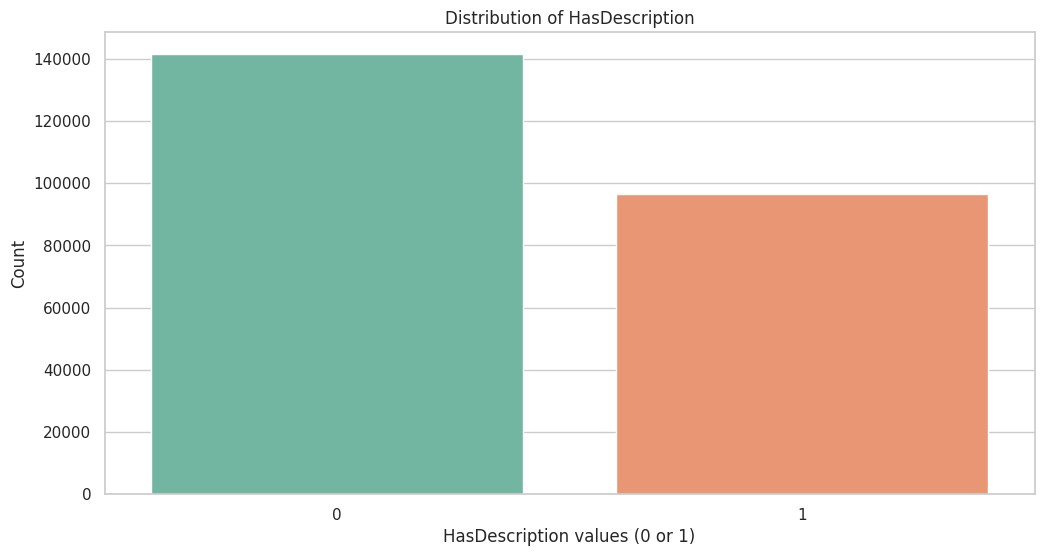

<ipython-input-22-a561710e682a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set2')


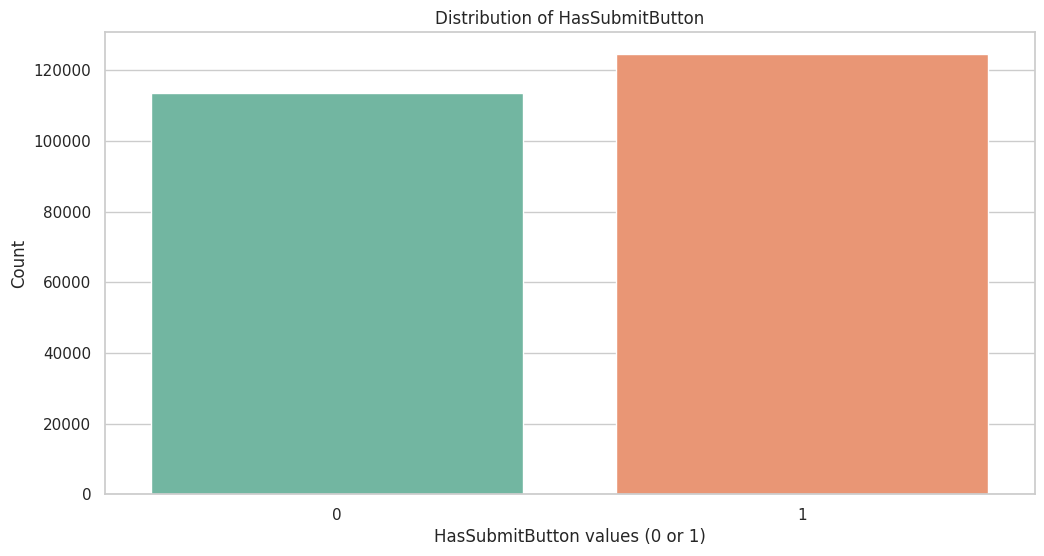

<ipython-input-22-a561710e682a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set2')


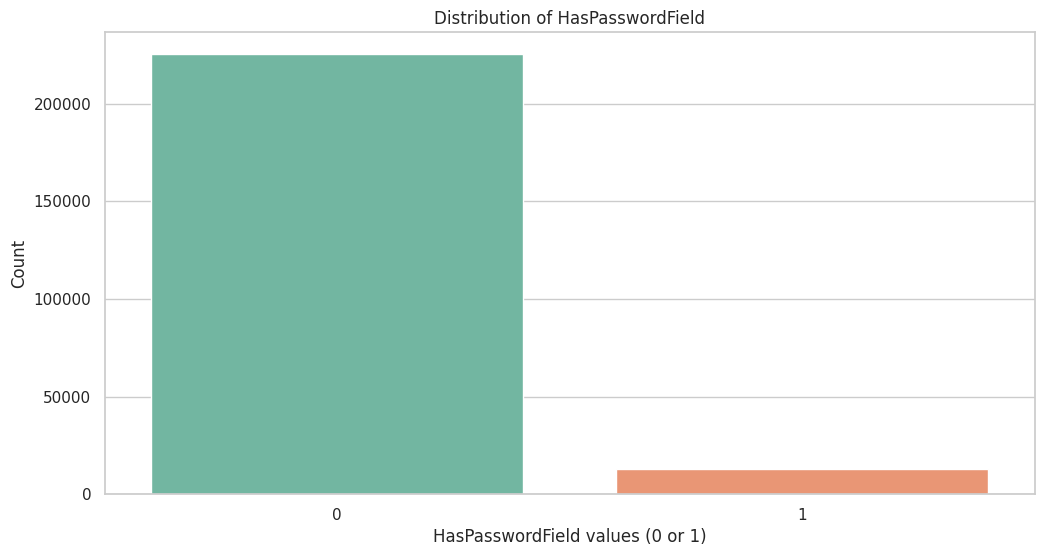

<ipython-input-22-a561710e682a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set2')


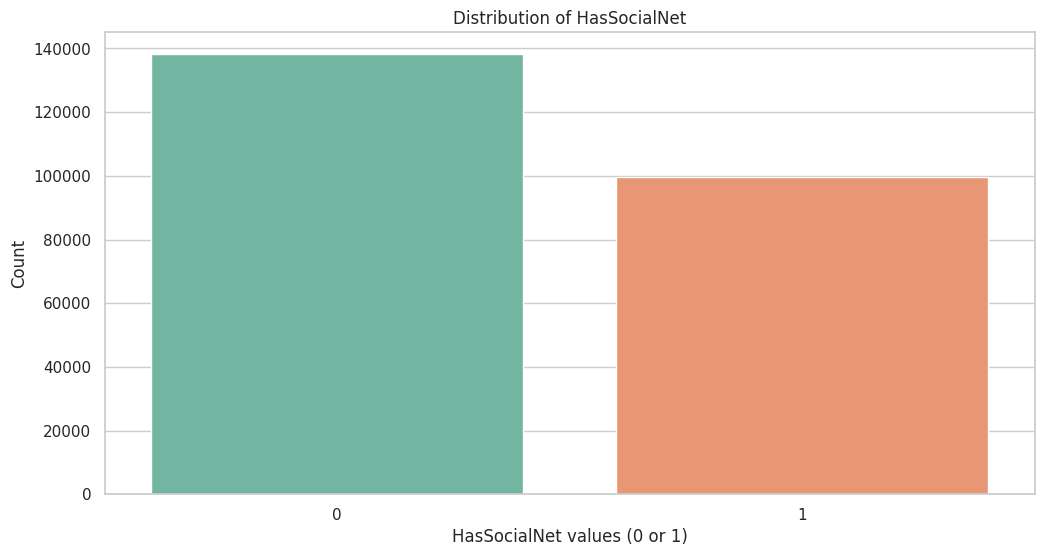

<ipython-input-22-a561710e682a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set2')


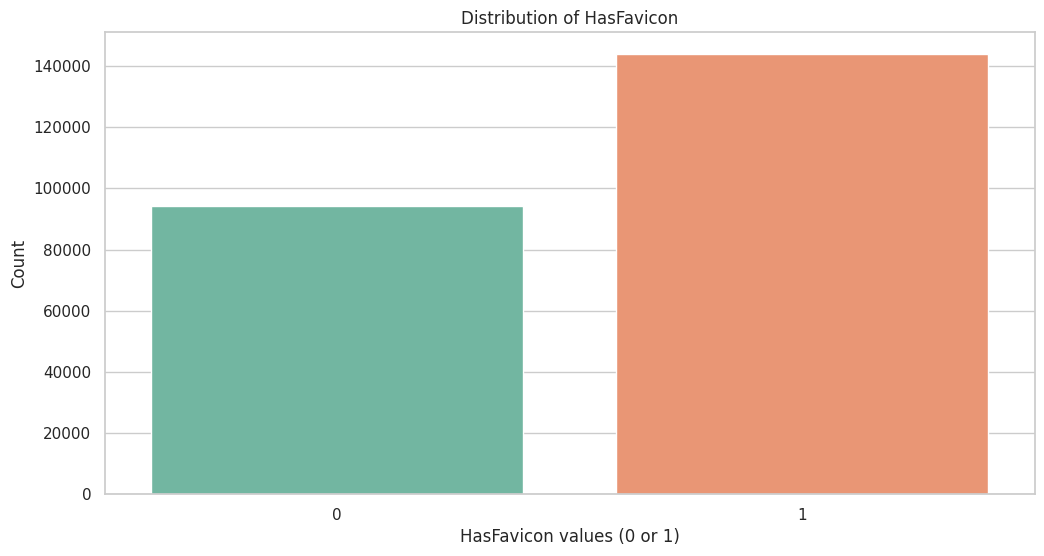

<ipython-input-22-a561710e682a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set2')


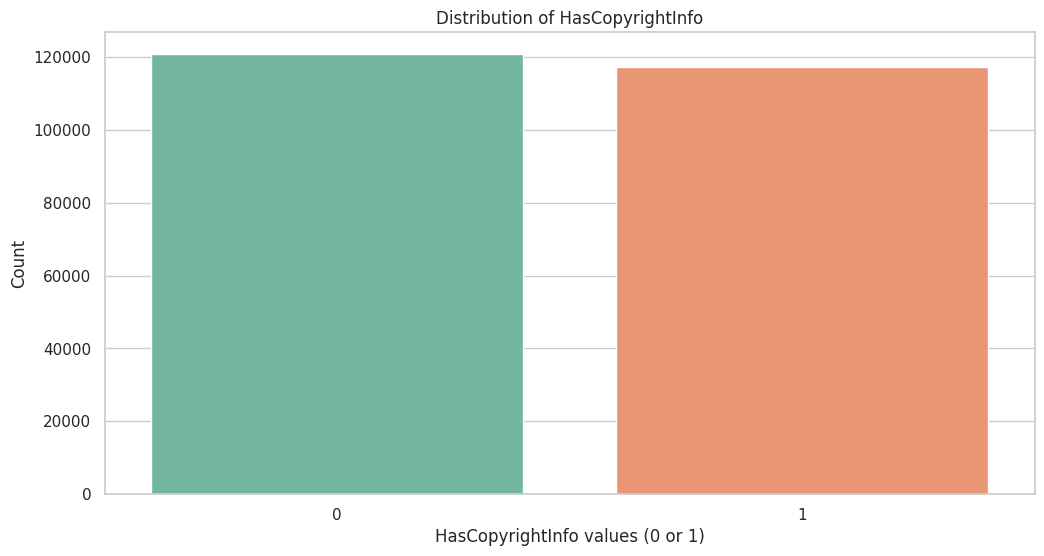

<ipython-input-22-a561710e682a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set2')


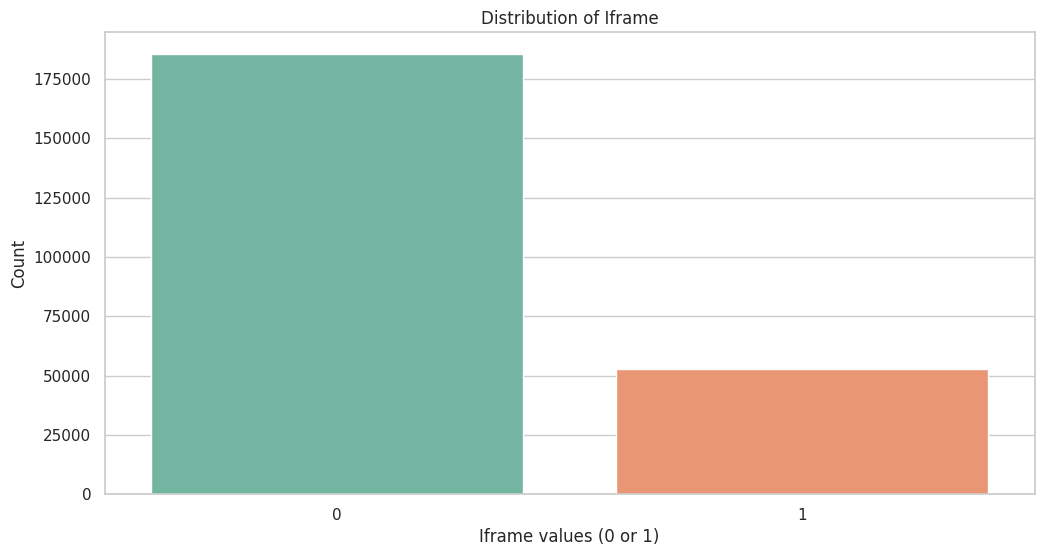

<ipython-input-22-a561710e682a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set2')


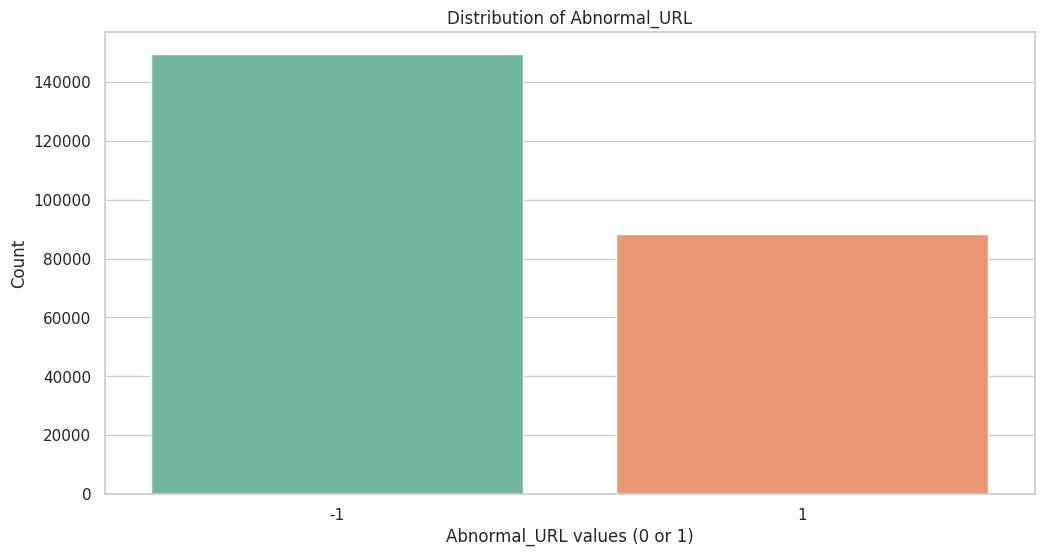

<ipython-input-22-a561710e682a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set2')


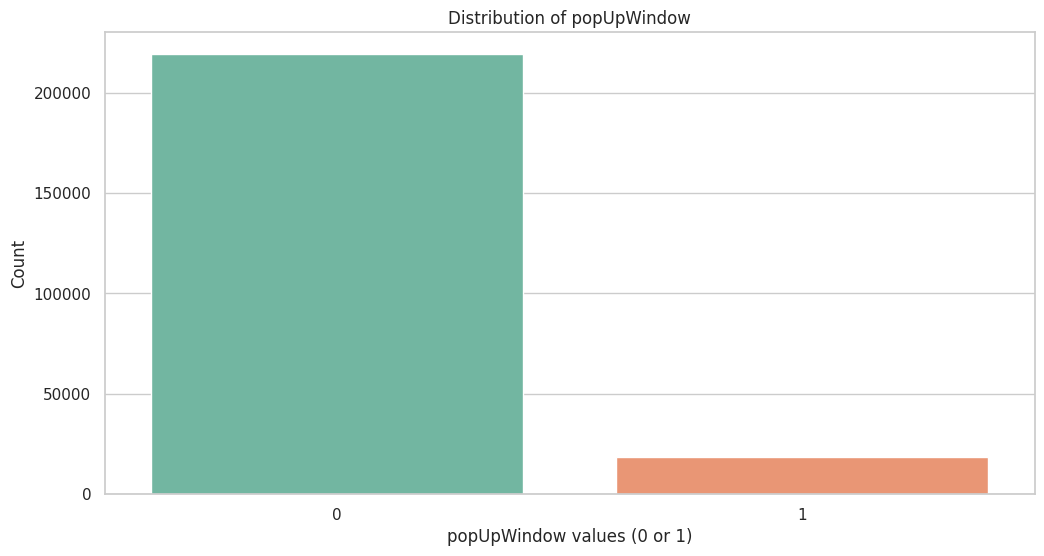

<ipython-input-22-a561710e682a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set2')


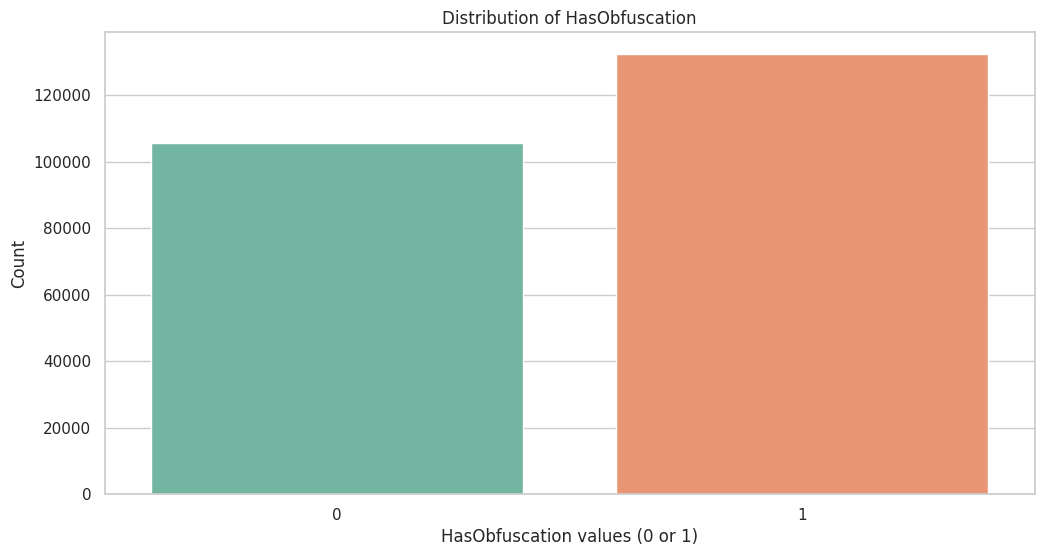

=== Ternary Feature Distributions ===


<ipython-input-22-a561710e682a>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette='Set1')


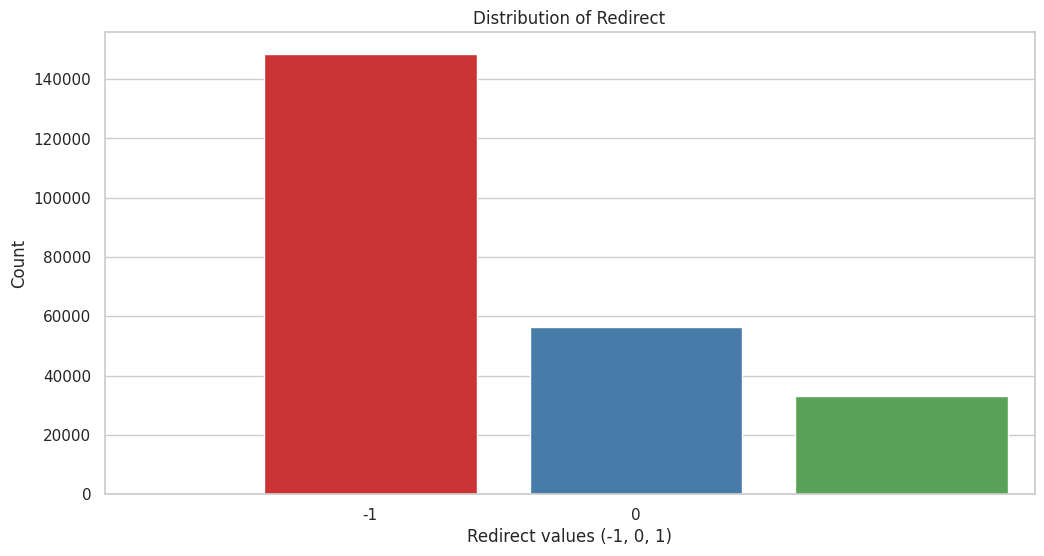

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Binary and ternary features based on actual data
binary_features = [
    'IsHTTPS', 'HasTitle', 'HasDescription', 'HasSubmitButton',
    'HasPasswordField', 'HasSocialNet', 'HasFavicon',
    'HasCopyrightInfo', 'Iframe', 'Abnormal_URL',
    'popUpWindow', 'HasObfuscation'  # only include if still present
]

ternary_features = ['Redirect']

# Check and drop features that might not be in df anymore
binary_features = [col for col in binary_features if col in df.columns]
ternary_features = [col for col in ternary_features if col in df.columns]

# Plot binary feature distributions
print("=== Binary Feature Distributions ===")
for col in binary_features:
    plt.figure()
    sns.countplot(data=df_cleaned, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col} values (0 or 1)')
    plt.ylabel('Count')
    plt.xticks([0, 1])
    plt.show()

# Plot ternary feature distributions
print("=== Ternary Feature Distributions ===")
for col in ternary_features:
    plt.figure()
    sns.countplot(data=df_cleaned, x=col, palette='Set1')
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col} values (-1, 0, 1)')
    plt.ylabel('Count')
    plt.xticks([-1, 0, 1])
    plt.show()


In [ ]:
print(df_cleaned['HasObfuscation'].value_counts())
print(df_cleaned['popUpWindow'].value_counts())

HasObfuscation
1    132247
0    105714
Name: count, dtype: int64
popUpWindow
0    219178
1     18783
Name: count, dtype: int64


In [ ]:
# Check remaining ternary features again
ternary_remaining = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 3 and col != 'Label']

# Display value counts per label for each ternary feature
for col in ternary_remaining:
    print(f"\n=== {col} by Label ===")
    print(df_cleaned.groupby([col, 'Label']).size().unstack(fill_value=0))



=== Redirect by Label ===
Label         0       1
Redirect               
-1        43710  104706
 0        44414   12035
 1        16984   16112


In [ ]:
# Drop the URL column if it exists
if 'URL' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=['URL'])
print("✅ URL column removed (if present).")

✅ URL column removed (if present).


In [ ]:
print("Shape of the cleaned dataset:", df_cleaned.shape)

Shape of the cleaned dataset: (237961, 26)


Duplicate Got Increase After removing the URL

In [ ]:
# Find duplicate rows
duplicates = df_cleaned[df_cleaned.duplicated()]

# Count duplicates
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 48238


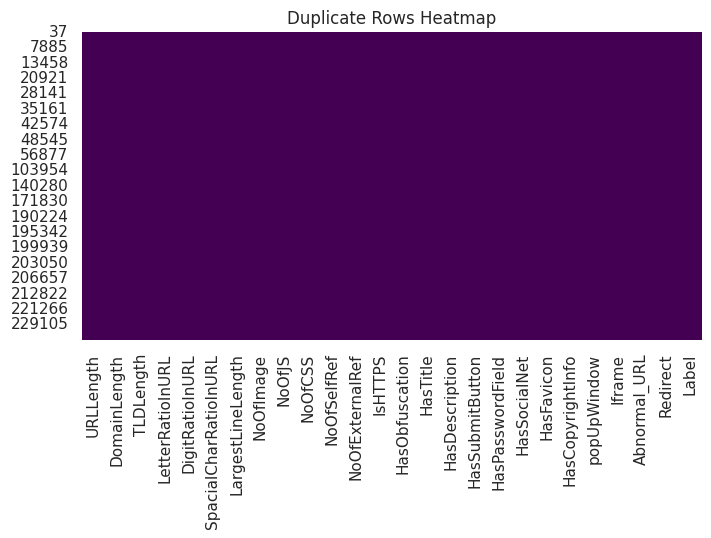

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize if there are any duplicates
if not duplicates.empty:
    plt.figure(figsize=(8, 4))
    sns.heatmap(duplicates.isnull(), cbar=False, cmap='viridis')
    plt.title('Duplicate Rows Heatmap')
    plt.show()
else:
    print("No duplicate rows to visualize.")


In [ ]:
# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Confirm removal
print(f"Shape after removing duplicates: {df_cleaned.shape}")


Shape after removing duplicates: (189723, 26)


<ipython-input-30-a31d8e4a12e2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Label', palette='coolwarm')


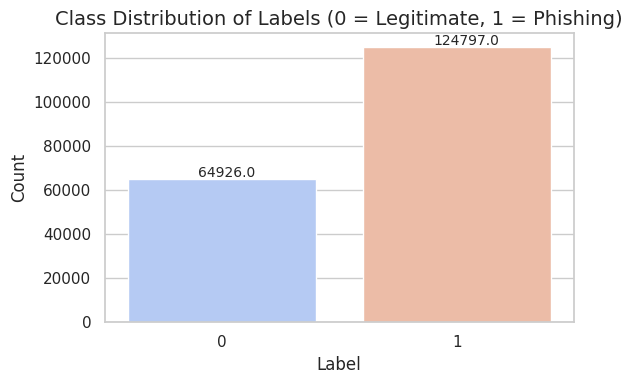

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='Label', palette='coolwarm')

# Add labels and title
plt.title('Class Distribution of Labels (1 = Legitimate, 0 = Phishing)', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show values on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 1000), fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Drop features with near-zero variance
selector = VarianceThreshold(threshold=0.01)
selector.fit(df_cleaned.drop(columns=['Label']))  # Don't include target

low_variance_cols = df_cleaned.drop(columns=['Label']).columns[~selector.get_support()]
print("Low Variance Columns:\n", low_variance_cols.tolist())


Low Variance Columns:
 ['LetterRatioInURL', 'DigitRatioInURL', 'SpacialCharRatioInURL']


In [ ]:
# Compute correlation with target
correlation = df_cleaned.corr()['Label'].abs().sort_values()
low_corr_features = correlation[correlation < 0.03].index.tolist()
print("Low Correlation with Target:\n", low_corr_features)


Low Correlation with Target:
 ['LargestLineLength', 'HasPasswordField']


In [ ]:
import numpy as np
# Correlation matrix
corr_matrix = df_cleaned.drop(columns=['Label']).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs with high correlation
high_corr_pairs = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly Correlated Columns:\n", high_corr_pairs)

Highly Correlated Columns:
 []


In [ ]:
import numpy as np
import pandas as pd

# Compute absolute correlation matrix (excluding 'Label' to avoid target leakage)
corr_matrix = df_cleaned.drop(columns=['Label']).corr().abs()

# Create an upper triangle matrix to avoid duplicate checks
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Flatten the matrix and drop NaNs
correlations = upper_tri.stack().reset_index()
correlations.columns = ['Feature1', 'Feature2', 'Correlation']

# Sort by correlation in descending order and get the top 10
top_10_corr = correlations.sort_values(by='Correlation', ascending=False).head(10)

# Print the top 10 correlated feature pairs
print("Top 10 highly correlated feature pairs:\n")
for idx, row in top_10_corr.iterrows():
    print(f"{row['Feature1']} and {row['Feature2']} -> Correlation: {row['Correlation']:.2f}")


Top 10 highly correlated feature pairs:

LetterRatioInURL and DigitRatioInURL -> Correlation: 0.85
HasSocialNet and Abnormal_URL -> Correlation: 0.55
NoOfJS and NoOfCSS -> Correlation: 0.50
DomainLength and SpacialCharRatioInURL -> Correlation: 0.47
DigitRatioInURL and Abnormal_URL -> Correlation: 0.47
IsHTTPS and Redirect -> Correlation: 0.47
IsHTTPS and Abnormal_URL -> Correlation: 0.46
HasSubmitButton and HasSocialNet -> Correlation: 0.46
HasDescription and HasSocialNet -> Correlation: 0.45
HasSocialNet and HasCopyrightInfo -> Correlation: 0.45


In [ ]:
# Step 1: Create a new feature combining the low variance ratio columns
df_cleaned['LetterToDigitRatio'] = df_cleaned['LetterRatioInURL'] / (df_cleaned['DigitRatioInURL'] + 1e-5)

# Step 2: Drop original low variance features
low_variance_cols = ['LetterRatioInURL', 'DigitRatioInURL', 'SpacialCharRatioInURL']
df_cleaned.drop(columns=low_variance_cols, inplace=True)

# Step 3: Drop features with low correlation to target
low_corr_cols = ['LargestLineLength', 'HasPasswordField']
df_cleaned.drop(columns=low_corr_cols, inplace=True)

# Optional: Check the shape and print confirmation
print("Updated DataFrame shape:", df_cleaned.shape)


Updated DataFrame shape: (189723, 22)


In [ ]:
import numpy as np
import pandas as pd

# Compute absolute correlation matrix (excluding 'Label' to avoid target leakage)
corr_matrix = df_cleaned.drop(columns=['Label']).corr().abs()

# Create an upper triangle matrix to avoid duplicate checks
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Set correlation threshold
threshold = 0.8

# Find and print highly correlated feature pairs
print("Highly correlated feature pairs (correlation > 0.95):\n")
for col in upper_tri.columns:
    for row in upper_tri.index:
        if pd.notnull(upper_tri.loc[row, col]) and upper_tri.loc[row, col] > threshold:
            print(f"{row} and {col} -> Correlation: {upper_tri.loc[row, col]:.2f}")


Highly correlated feature pairs (correlation > 0.95):



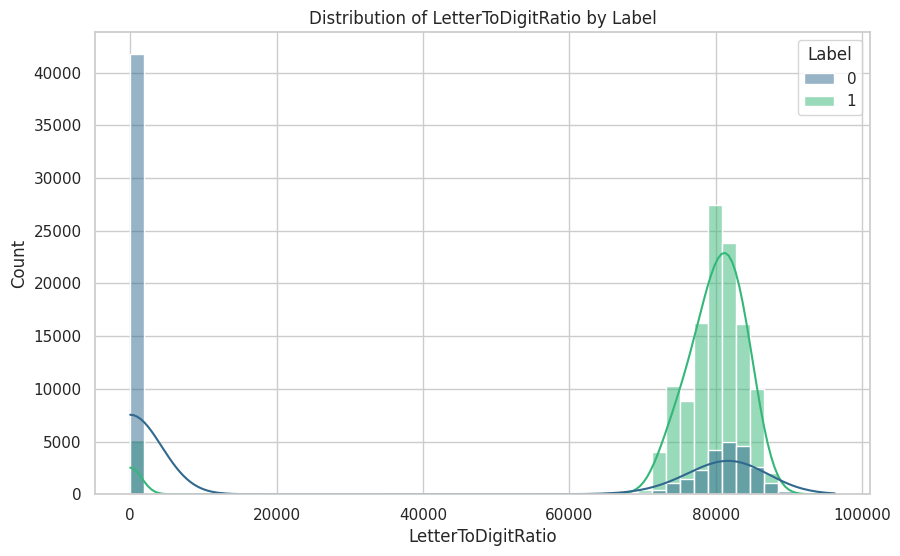

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='LetterToDigitRatio', hue='Label', bins=50, kde=True, palette='viridis')
plt.title("Distribution of LetterToDigitRatio by Label")
plt.xlabel("LetterToDigitRatio")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [ ]:
correlation = df_cleaned[['LetterToDigitRatio', 'Label']].corr()
print("Correlation with target:\n", correlation['Label'])


Correlation with target:
 LetterToDigitRatio    0.652533
Label                 1.000000
Name: Label, dtype: float64


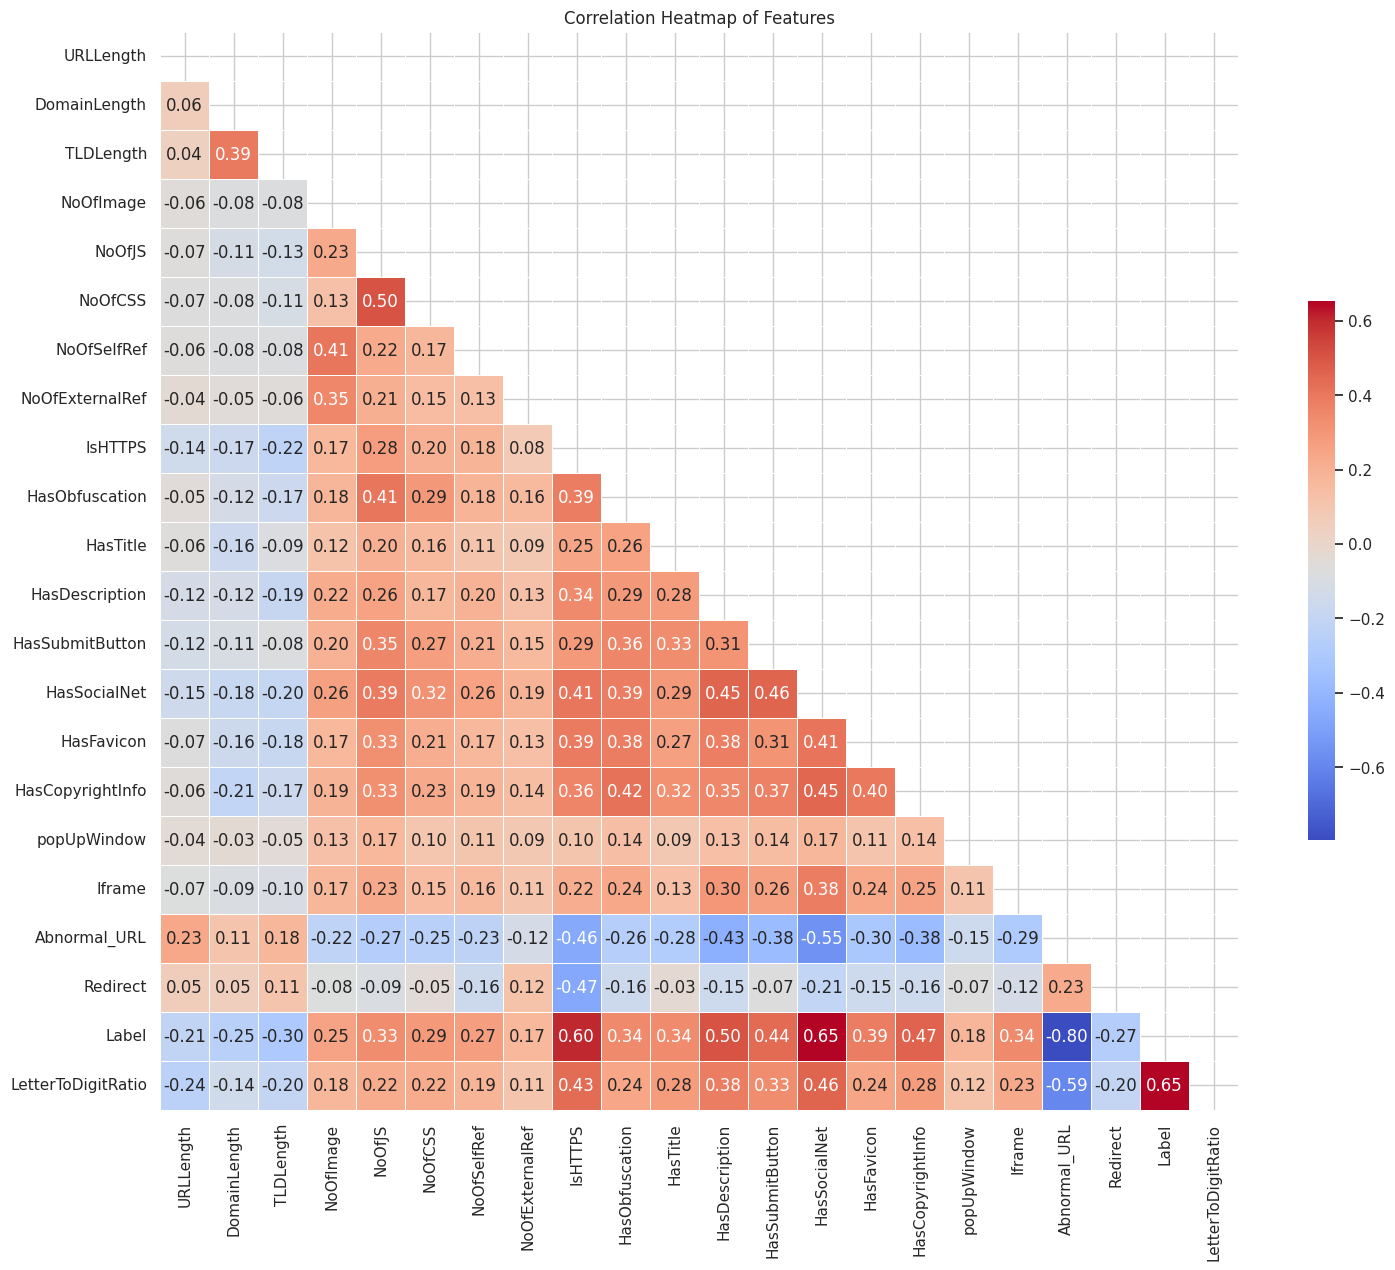

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
plt.figure(figsize=(18, 14))
correlation_matrix = df_cleaned.corr()

# Create a mask to show only lower triangle for cleaner look
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Draw the heatmap
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .5}
)

plt.title("Correlation Heatmap of Features")
plt.show()

In [ ]:
import pandas as pd

# Compute correlation matrix
corr_matrix = df_cleaned.corr()

# 1. Print correlation of each feature with the target 'Label'
print("=== Correlation with Target (Label) ===")
label_corr = corr_matrix['Label'].sort_values(ascending=False)
print(label_corr)

# 2. Find and print pairs of features with high correlation (excluding 'Label')
print("\n=== Highly Correlated Feature Pairs (|corr| > 0.8, excluding 'Label') ===")
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        feat1 = corr_matrix.columns[i]
        feat2 = corr_matrix.columns[j]
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.8 and feat1 != 'Label' and feat2 != 'Label':
            high_corr_pairs.append((feat1, feat2, corr_value))

# Display the results
for pair in high_corr_pairs:
    print(f"{pair[0]} ↔ {pair[1]} : Correlation = {pair[2]:.3f}")


=== Correlation with Target (Label) ===
Label                 1.000000
LetterToDigitRatio    0.652533
HasSocialNet          0.647296
IsHTTPS               0.604209
HasDescription        0.500212
HasCopyrightInfo      0.465517
HasSubmitButton       0.441190
HasFavicon            0.385014
HasObfuscation        0.344712
Iframe                0.343191
HasTitle              0.336580
NoOfJS                0.330371
NoOfCSS               0.286886
NoOfSelfRef           0.271498
NoOfImage             0.254988
popUpWindow           0.179259
NoOfExternalRef       0.166352
URLLength            -0.213742
DomainLength         -0.253254
Redirect             -0.269983
TLDLength            -0.299144
Abnormal_URL         -0.797234
Name: Label, dtype: float64

=== Highly Correlated Feature Pairs (|corr| > 0.8, excluding 'Label') ===


In [ ]:
# Check if all columns are numeric
print(df_cleaned.dtypes)

# Confirm no object or category types
non_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns
print("Non-numeric columns (if any):", non_numeric_cols.tolist())


URLLength               int64
DomainLength            int64
TLDLength               int64
NoOfImage               int64
NoOfJS                  int64
NoOfCSS                 int64
NoOfSelfRef             int64
NoOfExternalRef         int64
IsHTTPS                 int64
HasObfuscation          int64
HasTitle                int64
HasDescription          int64
HasSubmitButton         int64
HasSocialNet            int64
HasFavicon              int64
HasCopyrightInfo        int64
popUpWindow             int64
Iframe                  int64
Abnormal_URL            int64
Redirect                int64
Label                   int64
LetterToDigitRatio    float64
dtype: object
Non-numeric columns (if any): []


In [ ]:
for col in df_cleaned.columns:
    unique_vals = df_cleaned[col].unique()
    print(f"\n=== {col} ===")
    print(f"Unique Values ({len(unique_vals)}): {unique_vals}")



=== URLLength ===
Unique Values (667): [   30    29    63    41    44    33    25    34    54    37    40    39
    21    38    45    27    69    36    82    32    42    47    49    62
    24    50   124    18    52   199    67    78   238   239   263   243
   242   266   262   275   120   233    35   182   163   183   181   184
    51    55    22    64    23    48    43    31   252    58    60   228
    26    53    84   107   123    99    46    81    79    95    70    87
    76    57    68   219   204   240    61    94    75    65   125   104
    90    89    93    73   112   109   116    83    85    28   466   307
   467    80    92    74    72   105   176    17   459    97    86    66
   431    56   148   118    19   341   346   211    77   170   168   374
   108    88    59   236   232   257   100   117   111   178   180    20
   136   198   121   128   103   192    91   227   102   317   191   126
   187   423   429   106   248   250    71   245   146   225    14   399
    13   26

In [ ]:
import pandas as pd

# Thresholds
max_unique = 15  # max number of unique values to still consider one-hot encoding
max_dtype = ['object', 'category', 'bool', 'int64']

# Check suitable columns for one-hot encoding
def check_one_hot_encoding_eligibility(df_cleaned, max_unique=15):
    eligible_columns = []
    print(f"{'Column':<25} | {'Unique Values'}")
    print("-"*45)

    for col in df_cleaned.columns:
        if df_cleaned[col].dtype in max_dtype:
            n_unique = df_cleaned[col].nunique()
            if n_unique <= max_unique:
                eligible_columns.append(col)
                print(f"{col:<25} | {n_unique}")

    return eligible_columns

# Usage
eligible_columns = check_one_hot_encoding_eligibility(df_cleaned)
print("\n✅ Columns suitable for One-Hot Encoding:")
print(eligible_columns)

Column                    | Unique Values
---------------------------------------------
IsHTTPS                   | 2
HasObfuscation            | 2
HasTitle                  | 2
HasDescription            | 2
HasSubmitButton           | 2
HasSocialNet              | 2
HasFavicon                | 2
HasCopyrightInfo          | 2
popUpWindow               | 2
Iframe                    | 2
Abnormal_URL              | 2
Redirect                  | 3
Label                     | 2

✅ Columns suitable for One-Hot Encoding:
['IsHTTPS', 'HasObfuscation', 'HasTitle', 'HasDescription', 'HasSubmitButton', 'HasSocialNet', 'HasFavicon', 'HasCopyrightInfo', 'popUpWindow', 'Iframe', 'Abnormal_URL', 'Redirect', 'Label']


In [ ]:
import pandas as pd

# Make a copy of your cleaned dataframe
df_encoded = df_cleaned.copy()

# Apply one-hot encoding to 'Redirect' only (ternary feature)
df_encoded = pd.get_dummies(df_encoded, columns=['Redirect'], drop_first=True)

# Final check
print("✅ Encoding complete.")
print("🧩 New shape of dataset:", df_encoded.shape)
print("📋 Columns after encoding:\n", df_encoded.columns.tolist())

✅ Encoding complete.
🧩 New shape of dataset: (189723, 23)
📋 Columns after encoding:
 ['URLLength', 'DomainLength', 'TLDLength', 'NoOfImage', 'NoOfJS', 'NoOfCSS', 'NoOfSelfRef', 'NoOfExternalRef', 'IsHTTPS', 'HasObfuscation', 'HasTitle', 'HasDescription', 'HasSubmitButton', 'HasSocialNet', 'HasFavicon', 'HasCopyrightInfo', 'popUpWindow', 'Iframe', 'Abnormal_URL', 'Label', 'LetterToDigitRatio', 'Redirect_0', 'Redirect_1']


In [ ]:
# Convert -1/1 to 0/1 for IsHTTPS and Abnormal_URL
df_encoded['IsHTTPS'] = df_encoded['IsHTTPS'].map({-1: 0, 1: 1})
df_encoded['Abnormal_URL'] = df_encoded['Abnormal_URL'].map({-1: 0, 1: 1})

# Convert boolean Redirect columns to integers
df_encoded['Redirect_0'] = df_encoded['Redirect_0'].astype(int)
df_encoded['Redirect_1'] = df_encoded['Redirect_1'].astype(int)


In [ ]:
print(df_encoded.head())

   URLLength  DomainLength  TLDLength  NoOfImage  NoOfJS  NoOfCSS  \
0         30            23          7          1       0        1   
1         29            14          3          1       0        0   
2         63            14          3          1       0        0   
3         41            34          9          0       3        1   
4         29            22          2          0       0        0   

   NoOfSelfRef  NoOfExternalRef  IsHTTPS  HasObfuscation  ...  HasSocialNet  \
0            0                3        0               0  ...             0   
1            0                2        0               0  ...             0   
2            0                2        0               0  ...             0   
3            1                2        0               0  ...             0   
4            0                0        0               0  ...             0   

   HasFavicon  HasCopyrightInfo  popUpWindow  Iframe  Abnormal_URL  Label  \
0           0                 0  

In [ ]:
# List of columns that should be binary (i.e., encoded)
binary_columns = [
    'IsHTTPS', 'HasObfuscation', 'HasTitle', 'HasDescription',
    'HasSubmitButton', 'HasSocialNet', 'HasFavicon',
    'HasCopyrightInfo', 'popUpWindow', 'Iframe',
    'Abnormal_URL', 'Redirect_0', 'Redirect_1'
]

# Function to check if all values in each binary column are 0 or 1 (or True/False)
def check_binary_encoding(df, columns):
    print(f"{'Column':<25} | {'Unique Values'} | {'Valid?'}")
    print("-" * 60)
    for col in columns:
        unique_vals = df[col].unique()
        valid = set(unique_vals).issubset({0, 1, True, False})
        print(f"{col:<25} | {unique_vals} | {'✅' if valid else '❌'}")

# Run the check
check_binary_encoding(df_encoded, binary_columns)


Column                    | Unique Values | Valid?
------------------------------------------------------------
IsHTTPS                   | [0 1] | ✅
HasObfuscation            | [0 1] | ✅
HasTitle                  | [1 0] | ✅
HasDescription            | [0 1] | ✅
HasSubmitButton           | [0 1] | ✅
HasSocialNet              | [0 1] | ✅
HasFavicon                | [0 1] | ✅
HasCopyrightInfo          | [0 1] | ✅
popUpWindow               | [0 1] | ✅
Iframe                    | [0 1] | ✅
Abnormal_URL              | [0 1] | ✅
Redirect_0                | [1 0] | ✅
Redirect_1                | [0 1] | ✅


In [ ]:
# Print shape and data types for confirmation
print("📊 Final DataFrame shape:", df_encoded.shape)
print("\n🧾 Data types:\n", df_encoded.dtypes)

# Show a few random rows for manual inspection
print("\n🔍 Sample rows (with actual data):")
sample_data = df_encoded.sample(5, random_state=42)
display(sample_data)


📊 Final DataFrame shape: (189723, 23)

🧾 Data types:
 URLLength               int64
DomainLength            int64
TLDLength               int64
NoOfImage               int64
NoOfJS                  int64
NoOfCSS                 int64
NoOfSelfRef             int64
NoOfExternalRef         int64
IsHTTPS                 int64
HasObfuscation          int64
HasTitle                int64
HasDescription          int64
HasSubmitButton         int64
HasSocialNet            int64
HasFavicon              int64
HasCopyrightInfo        int64
popUpWindow             int64
Iframe                  int64
Abnormal_URL            int64
Label                   int64
LetterToDigitRatio    float64
Redirect_0              int64
Redirect_1              int64
dtype: object

🔍 Sample rows (with actual data):


,URLLength,DomainLength,TLDLength,NoOfImage,NoOfJS,NoOfCSS,NoOfSelfRef,NoOfExternalRef,IsHTTPS,HasObfuscation,...,HasSocialNet,HasFavicon,HasCopyrightInfo,popUpWindow,Iframe,Abnormal_URL,Label,LetterToDigitRatio,Redirect_0,Redirect_1
19142,42,25,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,16.496536,1,0
128832,28,20,3,63,119,71,452,35,1,1,...,1,1,1,1,1,0,1,82142.857143,0,0
151132,23,15,3,26,27,15,182,8,1,1,...,0,1,1,0,0,0,1,78260.869565,0,0
86532,26,18,3,8,11,2,183,29,1,1,...,1,0,1,0,0,0,1,76923.076923,0,0
222240,34,25,4,0,15,2,19,10,1,1,...,0,1,0,0,0,1,0,3.499802,0,0


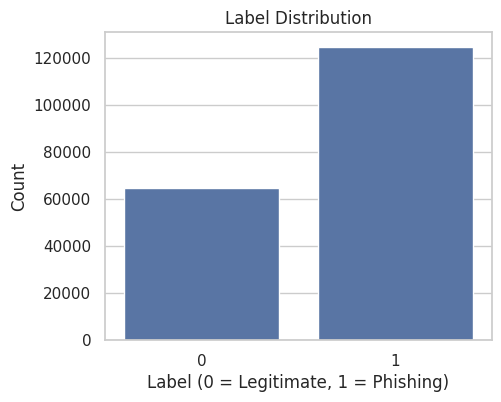

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Label', data=df_encoded)
plt.title('Label Distribution')
plt.xlabel('Label (1 = Legitimate, 0 = Phishing)')
plt.ylabel('Count')
plt.show()


<ipython-input-50-bf772dfaf978>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_encoded, x='Label', palette='Set2')


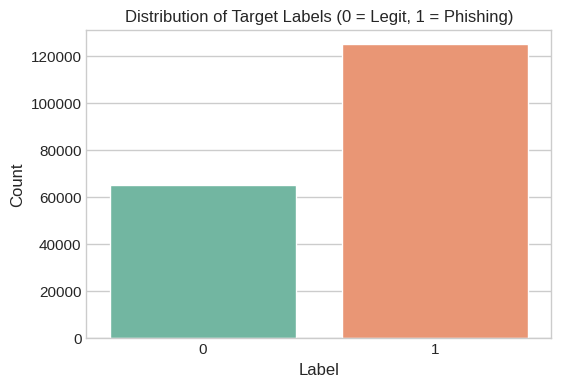

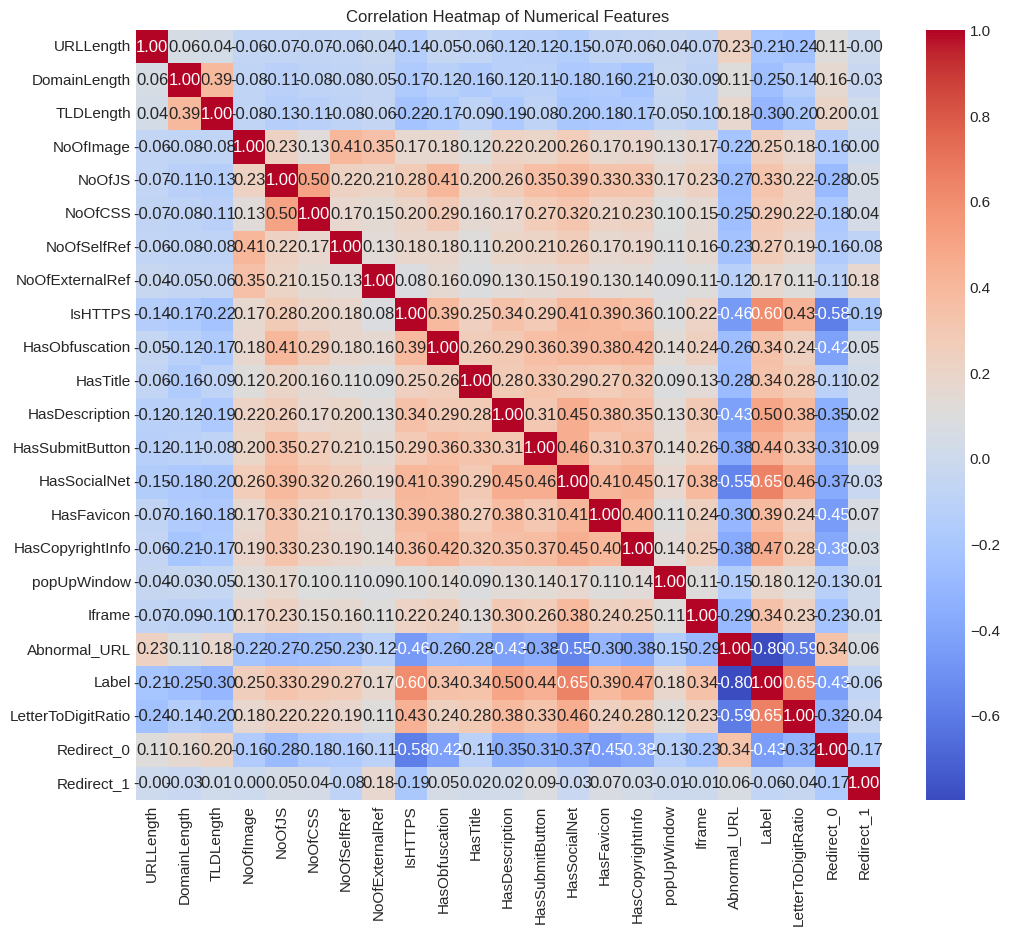

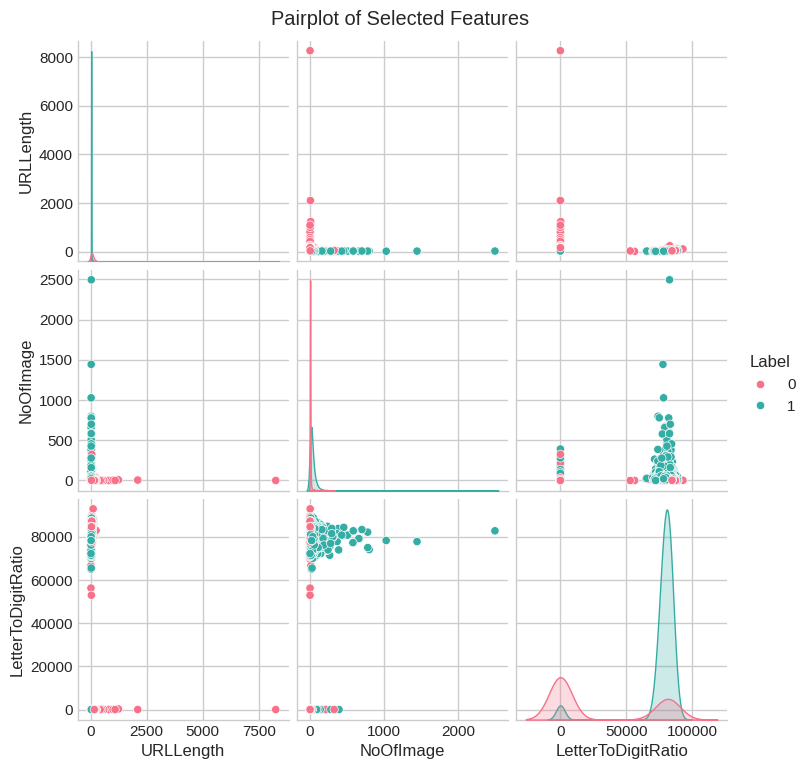

<ipython-input-50-bf772dfaf978>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='URLLength', data=df_encoded, palette='Set3')


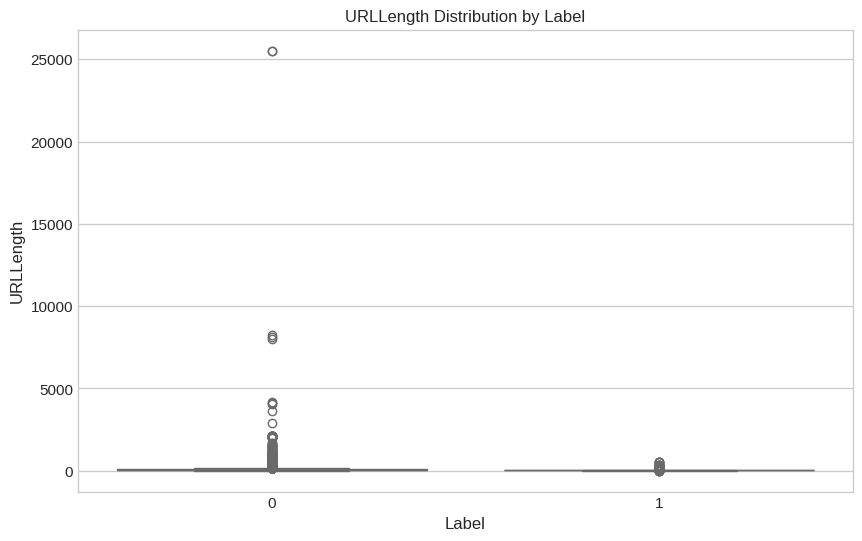

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
sns.set_style('whitegrid')

# Ensure plots display nicely
plt.style.use('seaborn-v0_8-whitegrid')  # ✅ correct
plt.rcParams['figure.figsize'] = (10, 6)

# -------- 1. Target Variable Distribution --------
plt.figure(figsize=(6, 4))
sns.countplot(data=df_encoded, x='Label', palette='Set2')
plt.title('Distribution of Target Labels (1 = Legit, 0 = Phishing)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# -------- 2. Correlation Heatmap (Numerical Only) --------
numerical_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded[numerical_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# -------- 3. Pairplot of a few key features --------
sampled_df = df_encoded.sample(n=5000, random_state=42)  # Subsample for performance
selected_features = ['URLLength', 'NoOfImage', 'LetterToDigitRatio', 'Label']
sns.pairplot(sampled_df[selected_features], hue='Label', palette='husl')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# -------- 4. Boxplot for Feature Distribution by Label --------
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='URLLength', data=df_encoded, palette='Set3')
plt.title('URLLength Distribution by Label')
plt.show()

# -------- 5. Countplot of Boolean Encoded Features --------
bool_features = df_encoded.select_dtypes(include='bool').columns

for col in bool_features:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df_encoded, x=col, hue='Label', palette='Set1')
    plt.title(f'{col} vs Label')
    plt.ylabel('Count')
    plt.legend(title='Label', labels=['Phishing (0)', 'Legitimate (1)'])
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# 🧩 1. Separate features and target
X = df_encoded.drop(columns=['Label'])   # your encoded dataframe
y = df_encoded['Label']

# ✂️ 2. Train-Test Split (no stratify to simulate natural imbalance; add if you prefer)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 📏 3. Scale features (fit only on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ⚖️ 4. Apply SMOTE only on training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# ✅ Done!
print("🎯 Original class distribution (train):")
print(y_train.value_counts())

print("\n🎯 After SMOTE (balanced train):")
print(pd.Series(y_train_balanced).value_counts())

print("\n🧪 Test set class distribution:")
print(y_test.value_counts())

# Optional: Convert X_train_balanced back to DataFrame for model compatibility
X_train_balanced_df = pd.DataFrame(X_train_balanced, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f7f510d7380>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


🎯 Original class distribution (train):
Label
1    99837
0    51941
Name: count, dtype: int64

🎯 After SMOTE (balanced train):
Label
1    99837
0    99837
Name: count, dtype: int64

🧪 Test set class distribution:
Label
1    24960
0    12985
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Convert both to DataFrame if they aren’t already
X_train_smote_df = pd.DataFrame(X_train_balanced, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Check for exact row matches
common_rows = pd.merge(X_train_smote_df, X_test_df, how='inner')

print(f"🔍 Common rows between SMOTE-augmented training set and test set: {len(common_rows)}")
if len(common_rows) == 0:
    print("✅ No data leakage! Test set is clean and not seen during training.")
else:
    print("⚠️ Data leakage detected! Check your data splitting or SMOTE application.")


<ipython-input-52-5fdd40435e82>:8: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  common_rows = pd.merge(X_train_smote_df, X_test_df, how='inner')


🔍 Common rows between SMOTE-augmented training set and test set: 0
✅ No data leakage! Test set is clean and not seen during training.


In [ ]:
# Check for duplicate rows in the training set (features)
duplicates_X_train = X_train_balanced_df[X_train_balanced_df.duplicated()]
print(f"Number of duplicate rows in the features (X_train_balanced_df): {duplicates_X_train.shape[0]}")

# Check for duplicate rows in the training labels
duplicates_y_train = pd.Series(y_train_balanced)[pd.Series(y_train_balanced).duplicated()]
print(f"Number of duplicate labels in the training set (y_train_balanced): {duplicates_y_train.shape[0]}")

# Combine X_train_balanced_df and y_train_balanced into a single DataFrame
train_combined_df = X_train_balanced_df.copy()
train_combined_df['Label'] = y_train_balanced

# Check for duplicate rows
duplicate_rows = train_combined_df[train_combined_df.duplicated()]

# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Print the number of duplicate rows
print(f"Number of duplicate rows in the entire training set (features + labels): {num_duplicates}")

# Optionally, you can drop duplicates from the entire dataset (features + labels)
train_combined_df_no_duplicates = train_combined_df.drop_duplicates()

# Check the shape after removing duplicates
print(f"Shape after removing duplicates (combined features + labels): {train_combined_df_no_duplicates.shape}")


Number of duplicate rows in the features (X_train_balanced_df): 13476
Number of duplicate labels in the training set (y_train_balanced): 199672
Number of duplicate rows in the entire training set (features + labels): 13412
Shape after removing duplicates (combined features + labels): (186262, 23)


In [ ]:
# Check the distribution of legitimate (0) and phishing (1) labels in y_train_balanced
legitimate_count = y_train_balanced.value_counts().get(0, 0)
phishing_count = y_train_balanced.value_counts().get(1, 0)

print(f"Legitimate (1) samples: {legitimate_count}")
print(f"Phishing (0) samples: {phishing_count}")

Legitimate (1) samples: 99837
Phishing (0) samples: 99837


In [ ]:
# Check for duplicate rows in the training set (features)
duplicates_X_train = X_train_balanced_df[X_train_balanced_df.duplicated()]
print(f"Number of duplicate rows in the features (X_train_balanced_df): {duplicates_X_train.shape[0]}")

# Check for duplicate labels in the training labels
duplicates_y_train = pd.Series(y_train_balanced)[pd.Series(y_train_balanced).duplicated()]
print(f"Number of duplicate labels in the training set (y_train_balanced): {duplicates_y_train.shape[0]}")

# Combine X_train_balanced_df and y_train_balanced into a single DataFrame
train_combined_df = X_train_balanced_df.copy()
train_combined_df['Label'] = y_train_balanced

# Check for duplicate rows (both features and labels)
duplicate_rows = train_combined_df[train_combined_df.duplicated()]

# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Print the number of duplicate rows
print(f"Number of duplicate rows in the entire training set (features + labels): {num_duplicates}")

# Optionally, you can drop duplicates from the entire dataset (features + labels)
train_combined_df_no_duplicates = train_combined_df.drop_duplicates()

# Check the shape after removing duplicates
print(f"Shape after removing duplicates (combined features + labels): {train_combined_df_no_duplicates.shape}")

# Drop duplicates from the combined DataFrame
train_combined_df.drop_duplicates(inplace=True)

# Separate the features and labels again after dropping duplicates
X_train_balanced_df = train_combined_df.drop(columns=['Label'])
y_train_balanced = train_combined_df['Label']

# Check the shapes after removing duplicates
print(f"Shape of X_train_balanced_df after removing duplicates: {X_train_balanced_df.shape}")
print(f"Shape of y_train_balanced after removing duplicates: {y_train_balanced.shape}")


Number of duplicate rows in the features (X_train_balanced_df): 13476
Number of duplicate labels in the training set (y_train_balanced): 199672
Number of duplicate rows in the entire training set (features + labels): 13412
Shape after removing duplicates (combined features + labels): (186262, 23)
Shape of X_train_balanced_df after removing duplicates: (186262, 22)
Shape of y_train_balanced after removing duplicates: (186262,)


In [ ]:
# Check the distribution of legitimate (0) and phishing (1) labels in y_train_balanced
legitimate_count = y_train_balanced.value_counts().get(0, 0)
phishing_count = y_train_balanced.value_counts().get(1, 0)

print(f"Legitimate (1) samples: {legitimate_count}")
print(f"Phishing (0) samples: {phishing_count}")

Legitimate (1) samples: 87667
Phishing (0) samples: 98595


In [ ]:
# Count label distribution in the training set
print("🎯 Label distribution in the training set (y_train_balanced):")
print(pd.Series(y_train_balanced).value_counts())

# Count label distribution in the testing set
print("\n🎯 Label distribution in the testing set (y_test):")
print(pd.Series(y_test).value_counts())


🎯 Label distribution in the training set (y_train_balanced):
Label
1    98595
0    87667
Name: count, dtype: int64

🎯 Label distribution in the testing set (y_test):
Label
1    24960
0    12985
Name: count, dtype: int64


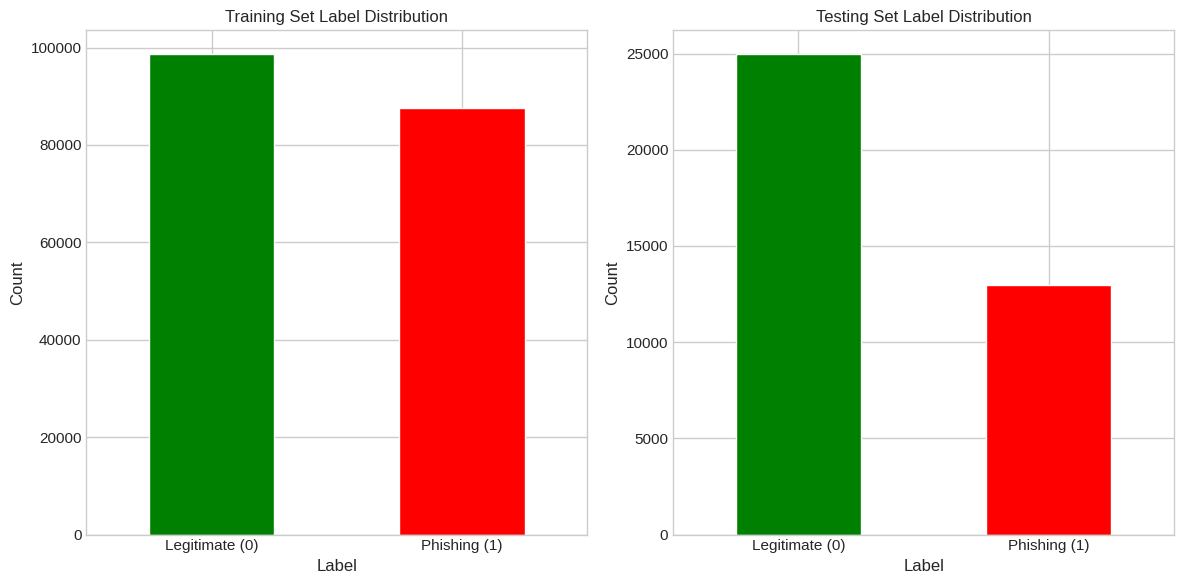

In [ ]:
import matplotlib.pyplot as plt

# Count label distribution in the training set
train_label_counts = pd.Series(y_train_balanced).value_counts()

# Count label distribution in the testing set
test_label_counts = pd.Series(y_test).value_counts()

# Plot the distribution for training data
plt.figure(figsize=(12, 6))

# Plot for Training Set
plt.subplot(1, 2, 1)
train_label_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Training Set Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legitimate (0)', 'Phishing (1)'], rotation=0)

# Plot for Testing Set
plt.subplot(1, 2, 2)
test_label_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Testing Set Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legitimate (0)', 'Phishing (1)'], rotation=0)

# Show the plots
plt.tight_layout()
plt.show()


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12985
           1       0.98      0.96      0.97     24960

    accuracy                           0.97     37945
   macro avg       0.96      0.97      0.96     37945
weighted avg       0.97      0.97      0.97     37945

✅ Accuracy: 0.9651601001449467
🔥 ROC AUC Score: 0.9862195299926937


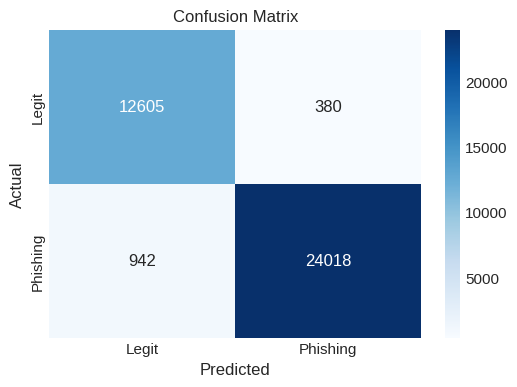

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 🎯 Train the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_balanced_df, y_train_balanced)

# 🧪 Predict on test data
y_pred = lr_model.predict(X_test_scaled_df)
y_proba = lr_model.predict_proba(X_test_scaled_df)[:, 1]  # for ROC AUC

# 📊 Evaluation Metrics
print("📋 Classification Report:")
print(classification_report(y_test, y_pred))

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("🔥 ROC AUC Score:", roc_auc_score(y_test, y_proba))

# 🔍 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Phishing'], yticklabels=['Legit', 'Phishing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

✅ Logistic Regression Evaluation:
Accuracy: 0.9652655158782448

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     12985
           1       0.98      0.96      0.97     24960

    accuracy                           0.97     37945
   macro avg       0.96      0.97      0.96     37945
weighted avg       0.97      0.97      0.97     37945



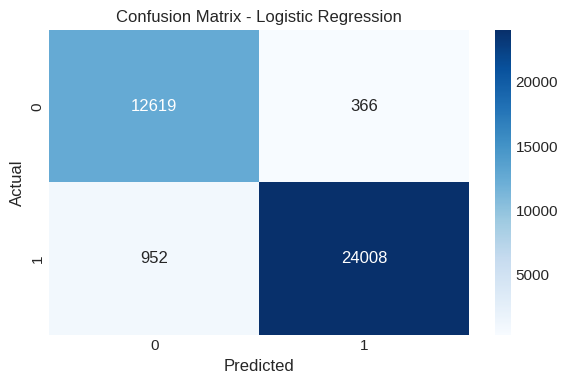

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Separate features and label
X = df_encoded.drop(columns=['Label'])
y = df_encoded['Label']

# 2. Split dataset (with stratify for class balance in test set)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# 5. Convert to DataFrame for readability
X_train_balanced_df = pd.DataFrame(X_train_balanced, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# 6. Logistic Regression model with interpretable parameters
lr_model = LogisticRegression(
    penalty='l2',          # L2 regularization to prevent overfitting
    C=1.0,                 # Regularization strength (default = 1.0)
    solver='liblinear',   # Suitable for small, binary classification problems
    max_iter=1000,        # Max iterations for convergence
    random_state=42
)

# 7. Train the model
lr_model.fit(X_train_balanced_df, y_train_balanced)

# 8. Predict on test set
y_pred = lr_model.predict(X_test_scaled_df)

# 9. Evaluate the model
print("✅ Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 10. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 📌 Model initialization with tuned parameters
dt_model = DecisionTreeClassifier(
    criterion='gini',       # 'gini' for Gini Impurity; 'entropy' could also be tried
    max_depth=10,           # Limit tree depth to reduce overfitting
    min_samples_split=10,   # Minimum samples to split a node
    min_samples_leaf=5,     # Minimum samples required at a leaf node
    random_state=42
)

# ✅ Training
dt_model.fit(X_train_balanced_df, y_train_balanced)

# 📊 Predictions
y_pred_dt = dt_model.predict(X_test_scaled_df)

# 📈 Evaluation
print("📌 Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


📌 Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12985
           1       0.99      0.98      0.98     24960

    accuracy                           0.98     37945
   macro avg       0.97      0.98      0.98     37945
weighted avg       0.98      0.98      0.98     37945

📊 Confusion Matrix:
[[12766   219]
 [  578 24382]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 📌 Initialize SVM with optimized parameters
svm_model = SVC(
    kernel='rbf',        # Radial Basis Function kernel (captures non-linear boundaries)
    C=1.0,               # Regularization parameter (1.0 is a good start)
    gamma='scale',       # Kernel coefficient (automatically scales with data)
    random_state=42
)

# ✅ Train the model on SMOTE-balanced training data
svm_model.fit(X_train_balanced_df, y_train_balanced)

# 📊 Predict on scaled test data
y_pred_svm = svm_model.predict(X_test_scaled_df)

# 📈 Evaluation
print("📌 Support Vector Machine Report:")
print(classification_report(y_test, y_pred_svm))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


📌 Support Vector Machine Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12985
           1       0.99      0.97      0.98     24960

    accuracy                           0.98     37945
   macro avg       0.97      0.98      0.98     37945
weighted avg       0.98      0.98      0.98     37945

📊 Confusion Matrix:
[[12833   152]
 [  672 24288]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 🌲 Initialize Random Forest with tuned parameters
rf_model = RandomForestClassifier(
    n_estimators=200,         # Number of trees in the forest
    max_depth=15,             # Limit depth to avoid overfitting
    min_samples_split=5,      # Minimum samples required to split an internal node
    min_samples_leaf=2,       # Minimum samples required to be at a leaf node
    random_state=42,
    n_jobs=-1                 # Use all processors for faster training
)

# ✅ Train the model on SMOTE-balanced training data
rf_model.fit(X_train_balanced_df, y_train_balanced)

# 📊 Predict on scaled test data
y_pred_rf = rf_model.predict(X_test_scaled_df)

# 📈 Evaluation
print("📌 Random Forest Classification Report:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred_rf))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


📌 Random Forest Classification Report:
Accuracy: 0.9652655158782448
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     12985
           1       0.99      0.98      0.99     24960

    accuracy                           0.98     37945
   macro avg       0.98      0.98      0.98     37945
weighted avg       0.98      0.98      0.98     37945

📊 Confusion Matrix:
[[12860   125]
 [  546 24414]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ⚙️ Initialize XGBoost Classifier with tuned parameters
xgb_model = XGBClassifier(
    n_estimators=200,        # Number of boosting rounds
    learning_rate=0.1,       # Step size shrinkage to prevent overfitting
    max_depth=6,             # Depth of each tree
    subsample=0.8,           # Randomly sample 80% of training data for each tree
    colsample_bytree=0.8,    # Randomly sample 80% of features for each tree
    use_label_encoder=False, # To prevent warning
    eval_metric='logloss',   # Evaluation metric
    random_state=42
)

# ✅ Train the model on balanced training data
xgb_model.fit(X_train_balanced_df, y_train_balanced)

# 📊 Predict on test data
y_pred_xgb = xgb_model.predict(X_test_scaled_df)

# 📈 Evaluation
print("📌 XGBoost Classification Report:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred_xgb))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:56:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 XGBoost Classification Report:
Accuracy: 0.9652655158782448
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12985
           1       0.99      0.98      0.99     24960

    accuracy                           0.98     37945
   macro avg       0.98      0.98      0.98     37945
weighted avg       0.98      0.98      0.98     37945

📊 Confusion Matrix:
[[12827   158]
 [  447 24513]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import numpy as np

# 🎯 Define parameter grid for tuning
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1],  # L1 regularization
    'reg_lambda': [0.5, 1, 1.5, 2]   # L2 regularization
}

# ⚙️ Initialize base model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 🔍 Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,  # number of combinations to try
    scoring='f1',  # or 'accuracy', 'roc_auc'
    cv=3,
    verbose=2,
    n_jobs=-1
)

# 🔧 Fit the randomized search
random_search.fit(X_train_balanced_df, y_train_balanced)

# 🏆 Best parameters and model
print("✅ Best Parameters Found:")
print(random_search.best_params_)

# 📊 Use best model for prediction
best_xgb = random_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled_df)

# 📈 Evaluation
print("📌 Tuned XGBoost Classification Report:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ⚙️ Initialize CatBoost Classifier with tuned parameters
cat_model = CatBoostClassifier(
    iterations=300,         # Number of trees
    learning_rate=0.1,      # Step size shrinkage
    depth=6,                # Depth of trees
    l2_leaf_reg=3,          # L2 regularization
    eval_metric='Logloss',  # Evaluation metric
    verbose=0,              # Set to 0 to silence training output
    random_seed=42
)

# ✅ Train the model
cat_model.fit(X_train_balanced_df, y_train_balanced)

# 📊 Predict on test set
y_pred_cat = cat_model.predict(X_test_scaled_df)

# 📈 Evaluation
print("📌 CatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_cat))


📌 CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     12985
           1       0.99      0.98      0.99     24960

    accuracy                           0.98     37945
   macro avg       0.98      0.98      0.98     37945
weighted avg       0.98      0.98      0.98     37945

Accuracy: 0.9652655158782448
📊 Confusion Matrix:
[[12833   152]
 [  491 24469]]


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ⚙️ Initialize LightGBM with tuned hyperparameters
lgb_model = LGBMClassifier(
    n_estimators=300,       # Number of boosting rounds
    learning_rate=0.05,     # Step size shrinkage
    max_depth=6,            # Max tree depth to control overfitting
    num_leaves=31,          # Number of leaves in full tree
    reg_alpha=1.0,          # L1 regularization (sparse features)
    reg_lambda=1.0,         # L2 regularization (prevent overfitting)
    subsample=0.8,          # Row sampling
    colsample_bytree=0.8,   # Feature sampling
    random_state=42
)

# ✅ Train the model
lgb_model.fit(X_train_balanced_df, y_train_balanced)

# 📊 Predict on test set
y_pred_lgb = lgb_model.predict(X_test_scaled_df)

# 📈 Evaluation
print("📌 LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 99837, number of negative: 99837
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3883
[LightGBM] [Info] Number of data points in the train set: 199674, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# 📏 Input shape
input_dim = X_train_balanced_df.shape[1]

# 🧱 Build the model
mlp_model = Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Binary classification
])

# ⚙️ Compile the model
mlp_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# ⏱ Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 🏋️ Train the model
history = mlp_model.fit(
    X_train_balanced_df, y_train_balanced,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)

# 🔍 Evaluate on test data
y_pred_proba_mlp = mlp_model.predict(X_test_scaled_df)
y_pred_mlp = (y_pred_proba_mlp > 0.5).astype("int").flatten()

# 📈 Evaluation
print("📌 Feedforward Neural Network Classification Report:")
print(classification_report(y_test, y_pred_mlp))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9415 - loss: 0.1621 - val_accuracy: 0.9776 - val_loss: 0.0764
Epoch 2/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9714 - loss: 0.0866 - val_accuracy: 0.9808 - val_loss: 0.1022
Epoch 3/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9740 - loss: 0.0777 - val_accuracy: 0.9849 - val_loss: 0.0757
Epoch 4/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9748 - loss: 0.0751 - val_accuracy: 0.9857 - val_loss: 0.0603
Epoch 5/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9764 - loss: 0.0718 - val_accuracy: 0.9840 - val_loss: 0.0649
Epoch 6/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9766 - loss: 0.0717 - val_accuracy: 0.9877 - val_loss: 0.0623
Epoch 7/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9770 - loss: 0.0707 - val_accuracy: 0.9866 - val_loss: 0.0632
Epoch 8/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9776 - loss: 0.0682 - val_accuracy: 0.9852 - val_

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# 🧩 Reshape the data to 3D for 1D CNN: (samples, timesteps, features)
X_train_cnn = np.expand_dims(X_train_balanced_df.values, axis=2)
X_test_cnn = np.expand_dims(X_test_scaled_df.values, axis=2)

# 📐 Define input shape
input_shape = X_train_cnn.shape[1:]

# 🧱 Build the CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=32, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

# ⚙️ Compile the model
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# ⏱ Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 🏋️ Train the model
cnn_history = cnn_model.fit(
    X_train_cnn, y_train_balanced,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)

# 🔍 Predict and evaluate
y_pred_proba_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn = (y_pred_proba_cnn > 0.5).astype("int").flatten()

# 🧾 Evaluation
from sklearn.metrics import classification_report, confusion_matrix

print("📌 1D CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_cnn))



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


624/624 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9183 - loss: 0.2104 - val_accuracy: 0.9797 - val_loss: 0.1073
Epoch 2/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.9669 - loss: 0.0989 - val_accuracy: 0.9834 - val_loss: 0.0823
Epoch 3/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.9702 - loss: 0.0880 - val_accuracy: 0.9796 - val_loss: 0.0824
Epoch 4/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9725 - loss: 0.0837 - val_accuracy: 0.9829 - val_loss: 0.0803
Epoch 5/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9731 - loss: 0.0830 - val_accuracy: 0.9833 - val_loss: 0.0692
Epoch 6/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9729 - loss: 0.0818 - val_accuracy: 0.9816 - val_loss: 0.0753
Epoch 7/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9745 - loss: 0.0779 - val_accuracy: 0.9825 - val_loss: 0.0786
Epoch 8/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9746 - loss: 0.0756 - val_accurac

In [ ]:
from autogluon.tabular import TabularPredictor
import pandas as pd

# 🔄 Combine training features and target into one DataFrame
train_data = X_train_balanced_df.copy()
train_data['Label'] = y_train_balanced.values

test_data = X_test_scaled_df.copy()
test_data['Label'] = y_test.values

# 📍 Define the label column
label = 'Label'

# 📊 Fit the predictor
predictor = TabularPredictor(label=label, problem_type='binary', eval_metric='accuracy').fit(
    train_data=train_data,
    time_limit=300,  # Train for up to 5 minutes
    presets='best_quality'
)

# 🧪 Evaluate on test data
performance = predictor.evaluate(test_data)

# 🧠 Predict class probabilities
y_pred_proba_auto = predictor.predict_proba(test_data)[1]
y_pred_auto = predictor.predict(test_data)

# 🧾 Classification report
from sklearn.metrics import classification_report, confusion_matrix

print("📌 AutoGluon Classification Report:")
print(classification_report(y_test, y_pred_auto))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_auto))


No path specified. Models will be saved in: "AutogluonModels/ag-20250409_121159"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.66 GB / 12.67 GB (76.2%)
Disk Space Avail:   61.33 GB / 107.72 GB (56.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

📌 AutoGluon Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     12985
           1       0.99      0.98      0.99     24960

    accuracy                           0.98     37945
   macro avg       0.98      0.99      0.98     37945
weighted avg       0.98      0.98      0.98     37945

📊 Confusion Matrix:
[[12850   135]
 [  471 24489]]


In [ ]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L1,0.98403,0.986573,accuracy,15.140370,17.085872,141.306490,15.140370,17.085872,141.306490,1,True,1
1,WeightedEnsemble_L2,0.98403,0.986573,accuracy,15.143141,17.118257,141.344357,0.002771,0.032385,0.037868,2,True,2
2,WeightedEnsemble_L3,0.98403,0.986573,accuracy,15.143849,17.109126,142.551841,0.003479,0.023254,1.245351,3,True,4
3,LightGBMXT_BAG_L2,0.98345,0.985496,accuracy,18.736561,20.718593,215.243343,3.596191,3.632722,73.936853,2,True,3


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# 🎯 Accuracy
accuracy = accuracy_score(y_test, y_pred_auto)

# 📍 Precision, Recall, F1
precision = precision_score(y_test, y_pred_auto)
recall = recall_score(y_test, y_pred_auto)
f1 = f1_score(y_test, y_pred_auto)

# 🚀 AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba_auto)

# 🧾 Print all metrics
print("📊 AutoGluon Evaluation Metrics:")
print(f"✅ Accuracy:  {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"🔁 Recall:    {recall:.4f}")
print(f"📏 F1 Score:  {f1:.4f}")
print(f"📈 AUC-ROC:   {auc:.4f}")

# 🧠 Classification Report
print("\n📌 Full Classification Report:")
print(classification_report(y_test, y_pred_auto))

# 📊 Confusion Matrix
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_auto))


📊 AutoGluon Evaluation Metrics:
✅ Accuracy:  0.9840
🎯 Precision: 0.9945
🔁 Recall:    0.9811
📏 F1 Score:  0.9878
📈 AUC-ROC:   0.9982

📌 Full Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     12985
           1       0.99      0.98      0.99     24960

    accuracy                           0.98     37945
   macro avg       0.98      0.99      0.98     37945
weighted avg       0.98      0.98      0.98     37945


📊 Confusion Matrix:
[[12850   135]
 [  471 24489]]


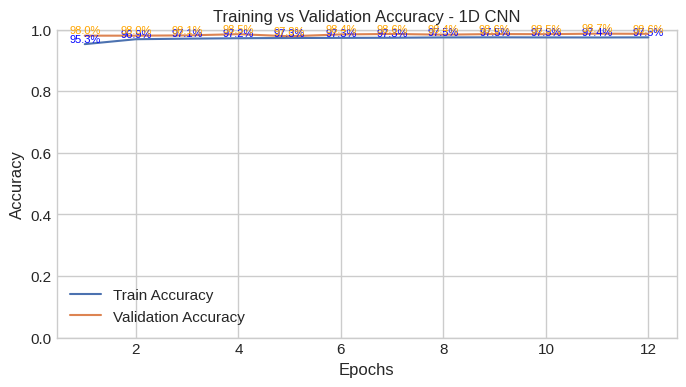

In [ ]:
# Accuracy Graph with percentage and annotation
train_acc = cnn_history.history['accuracy']
val_acc = cnn_history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, train_acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title("Training vs Validation Accuracy - 1D CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.ylim(0, 1)

# Add accuracy percentage annotations
for i, (t, v) in enumerate(zip(train_acc, val_acc)):
    plt.text(i+1, t, f"{t*100:.1f}%", ha='center', va='bottom', fontsize=8, color='blue')
    plt.text(i+1, v, f"{v*100:.1f}%", ha='center', va='bottom', fontsize=8, color='orange')

plt.show()

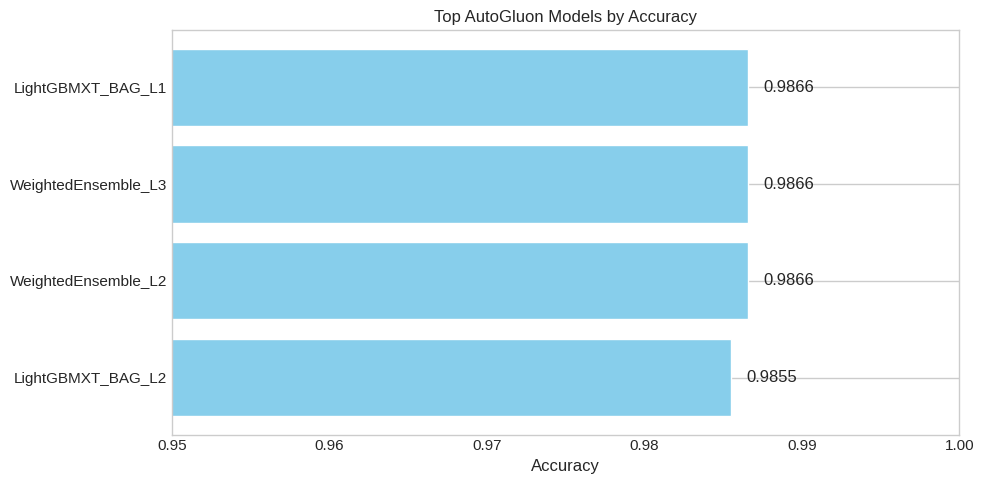

In [ ]:
import matplotlib.pyplot as plt

# Get leaderboard from AutoGluon predictor
leaderboard_df = predictor.leaderboard(test_data, silent=True)

# Plot top N models
top_n = 5
top_models = leaderboard_df.head(top_n)

plt.figure(figsize=(10, 5))
bars = plt.barh(top_models['model'], top_models['score_val'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Top AutoGluon Models by Accuracy')
plt.gca().invert_yaxis()

# Annotate bars with accuracy values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}', va='center')

plt.xlim(0.95, 1.00)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [ ]:
!pip install tab-transformer-pytorch

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Convert your dataset (already scaled and encoded)
X_train_tensor = torch.tensor(X_train_balanced_df.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_balanced.values, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_scaled_df.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# ✅ DataLoaders
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
test_ds = TensorDataset(X_test_tensor, y_test_tensor)

train_dl = DataLoader(train_ds, batch_size=512, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=512)

# ✅ MLP Model
class MLPClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.model(x)

# ✅ Initialize
model = MLPClassifier(input_dim=X_train_tensor.shape[1], num_classes=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# ✅ Training Loop
model.train()
for epoch in range(10):
    total_loss = 0
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = F.cross_entropy(logits, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

# ✅ Evaluation
model.eval()
all_preds = []
with torch.no_grad():
    for xb, _ in test_dl:
        xb = xb.to(device)
        logits = model(xb)
        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())

Epoch 1, Loss: 40.5307
Epoch 2, Loss: 29.4286
Epoch 3, Loss: 27.9307
Epoch 4, Loss: 26.8893
Epoch 5, Loss: 26.1651
Epoch 6, Loss: 25.5520
Epoch 7, Loss: 25.1785
Epoch 8, Loss: 24.8758
Epoch 9, Loss: 24.5473
Epoch 10, Loss: 24.4155


In [ ]:
# ✅ Report
acuuracy = accuracy_score(y_test, all_preds)
print(f"✅ Accuracy: {acuuracy * 100:.2f}%")
print("\n🧾 Classification Report for MLP:")
print(classification_report(y_test, all_preds))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, all_preds))

✅ Accuracy: 97.94%

🧾 Classification Report for MLP:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12985
           1       0.99      0.97      0.98     24960

    accuracy                           0.98     37945
   macro avg       0.97      0.98      0.98     37945
weighted avg       0.98      0.98      0.98     37945

📊 Confusion Matrix:
[[12845   140]
 [  642 24318]]


In [ ]:
!pip install pytorch-tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Convert to NumPy arrays (required by TabNet)
X_train_np = X_train_balanced_df.values
y_train_np = y_train_balanced.values

X_test_np = X_test_scaled_df.values
y_test_np = y_test.values

# Initialize TabNet Classifier
tabnet_clf = TabNetClassifier(
    n_d=64,                  # Dimension of the prediction layer
    n_a=64,                  # Dimension of the attention layer
    n_steps=5,               # Number of decision steps
    gamma=1.5,               # Relaxation parameter
    lambda_sparse=1e-4,      # Sparsity regularization
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    verbose=1,
    seed=42
)

# Fit model
tabnet_clf.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_train_np, y_train_np), (X_test_np, y_test_np)],
    eval_name=['train', 'test'],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10,
    batch_size=1024, virtual_batch_size=128,
)

# Predict on test set
preds = tabnet_clf.predict(X_test_np)


print("\n🧾 Classification Report for TabNet:")
print(classification_report(y_test_np, preds))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test_np, preds))



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.5 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.1324  | train_accuracy: 0.97195 | test_accuracy: 0.96637 |  0:01:04s
epoch 1  | loss: 0.08817 | train_accuracy: 0.97277 | test_accuracy: 0.97067 |  0:02:11s
epoch 2  | loss: 0.08921 | train_accuracy: 0.97309 | test_accuracy: 0.96996 |  0:03:18s
epoch 3  | loss: 0.08529 | train_accuracy: 0.97434 | test_accuracy: 0.97267 |  0:04:26s
epoch 4  | loss: 0.08413 | train_accuracy: 0.97313 | test_accuracy: 0.96727 |  0:05:32s
epoch 5  | loss: 0.08142 | train_accuracy: 0.97485 | test_accuracy: 0.97088 |  0:06:38s
epoch 6  | loss: 0.07834 | train_accuracy: 0.97544 | test_accuracy: 0.97101 |  0:07:45s
epoch 7  | loss: 0.08069 | train_accuracy: 0.97307 | test_accuracy: 0.97125 |  0:08:51s
epoch 8  | loss: 0.07801 | train_accuracy: 0.97489 | test_accuracy: 0.97043 |  0:09:57s
epoch 9  | loss: 0.07527 | train_accuracy: 0.97558 | test_accuracy: 0.97257 |  0:11:03s
epoch 10 | loss: 0.07355 | train_accuracy: 0.97607 | test_accuracy: 0.97214 |  0:12:09s
epoch 11 | loss: 0.0742  | train

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



🧾 Classification Report for TabNet:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12985
           1       0.99      0.98      0.99     24960

    accuracy                           0.98     37945
   macro avg       0.98      0.98      0.98     37945
weighted avg       0.98      0.98      0.98     37945

📊 Confusion Matrix:
[[12754   231]
 [  493 24467]]


NameError: name 'y_test_clean' is not defined

In [ ]:
acc_transformer = accuracy_score(y_test_np, y_pred)
print(f"✅ Accuracy: {acc_transformer * 100:.2f}%")

✅ Accuracy: 96.53%



==== Logistic Regression ====
Accuracy: 0.9653
Precision: 0.9850
Recall: 0.9619
F1-score: 0.9733
AUC-ROC: 0.9863

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12985
           1       0.98      0.96      0.97     24960

    accuracy                           0.97     37945
   macro avg       0.96      0.97      0.96     37945
weighted avg       0.97      0.97      0.97     37945


==== Decision Tree ====
Accuracy: 0.9790
Precision: 0.9911
Recall: 0.9768
F1-score: 0.9839
AUC-ROC: 0.9926

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12985
           1       0.99      0.98      0.98     24960

    accuracy                           0.98     37945
   macro avg       0.97      0.98      0.98     37945
weighted avg       0.98      0.98      0.98     37945


==== SVM ====
Accuracy: 0.9783
Precision: 0.9938
Recall: 0.9731
F1-score: 0

<Figure size 1200x800 with 0 Axes>

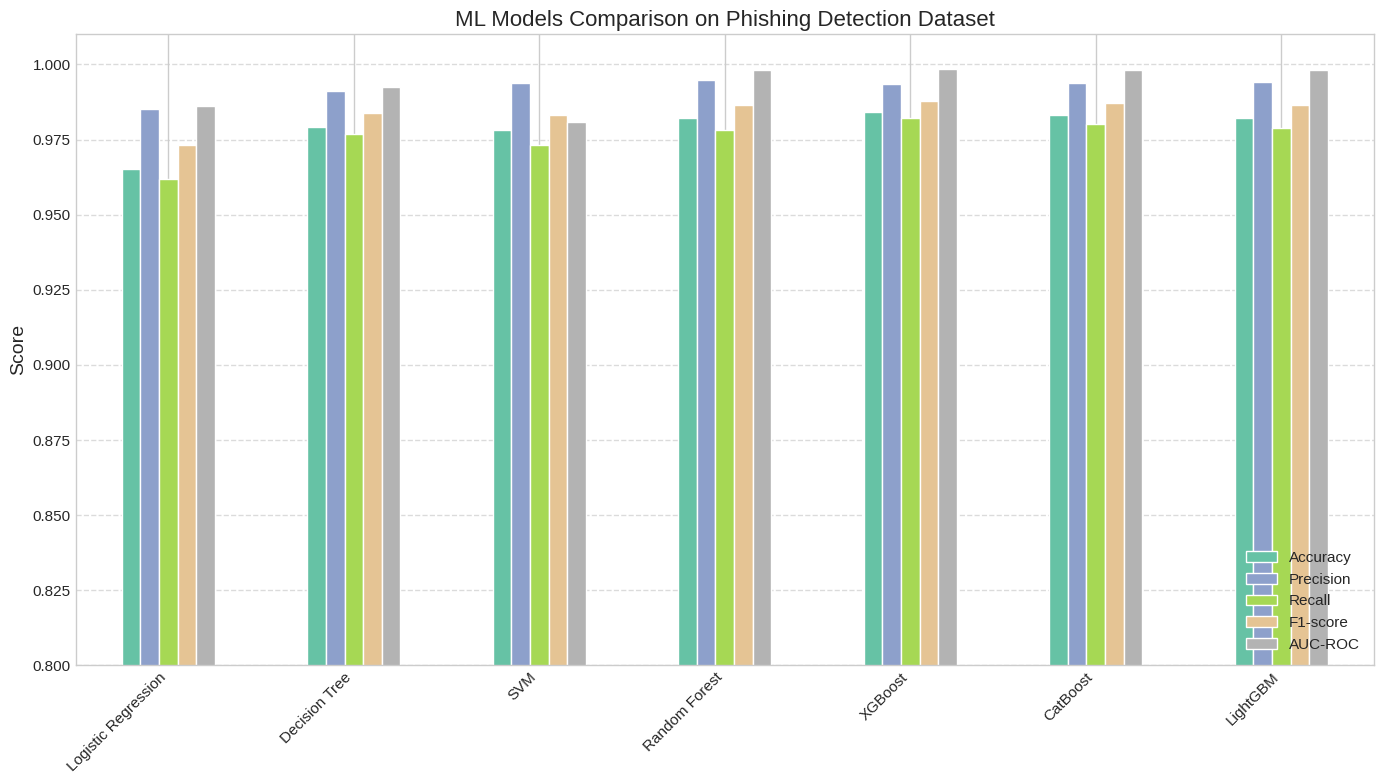


🔥 Best ML Model based on F1 and AUC-ROC:

         Accuracy  Precision  Recall  F1-score  AUC-ROC
XGBoost    0.9841     0.9936  0.9821    0.9878   0.9983


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Dictionary to hold all results
metrics_dict = {}

# Correct model names and variables from your training code
models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "SVM": svm_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "CatBoost": cat_model,
    "LightGBM": lgb_model
}

# Evaluate each model and store metrics
for name, model in models.items():
    y_pred = model.predict(X_test_scaled_df)
    y_proba = model.predict_proba(X_test_scaled_df)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else roc_auc_score(y_test, y_pred)

    print(f"\n==== {name} ====")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Store metrics
    metrics_dict[name] = {
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1-score": round(f1, 4),
        "AUC-ROC": round(auc, 4)
    }

# Convert dictionary to DataFrame for plotting
metrics_df = pd.DataFrame(metrics_dict).T

# Plotting metrics comparison
plt.figure(figsize=(12, 8))
metrics_df.plot(kind='bar', figsize=(14, 8), colormap='Set2')
plt.title("ML Models Comparison on Phishing Detection Dataset", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.8, 1.01)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Best model based on F1 and AUC
best_model = metrics_df.sort_values(by=["F1-score", "AUC-ROC"], ascending=False).head(1)
print("\n🔥 Best ML Model based on F1 and AUC-ROC:\n")
print(best_model)


In [ ]:
# Show which model has the highest score for each metric
print("📌 Best ML model for each metric:\n")
for metric in metrics_df.columns:
    best_model = metrics_df[metric].idxmax()
    best_score = metrics_df[metric].max()
    print(f"🔹 {metric}: {best_model} ({best_score:.4f})")


📌 Best ML model for each metric:

🔹 Accuracy: XGBoost (0.9841)
🔹 Precision: Random Forest (0.9949)
🔹 Recall: XGBoost (0.9821)
🔹 F1-score: XGBoost (0.9878)
🔹 AUC-ROC: XGBoost (0.9983)


<ipython-input-110-2cac549758ab>:50: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


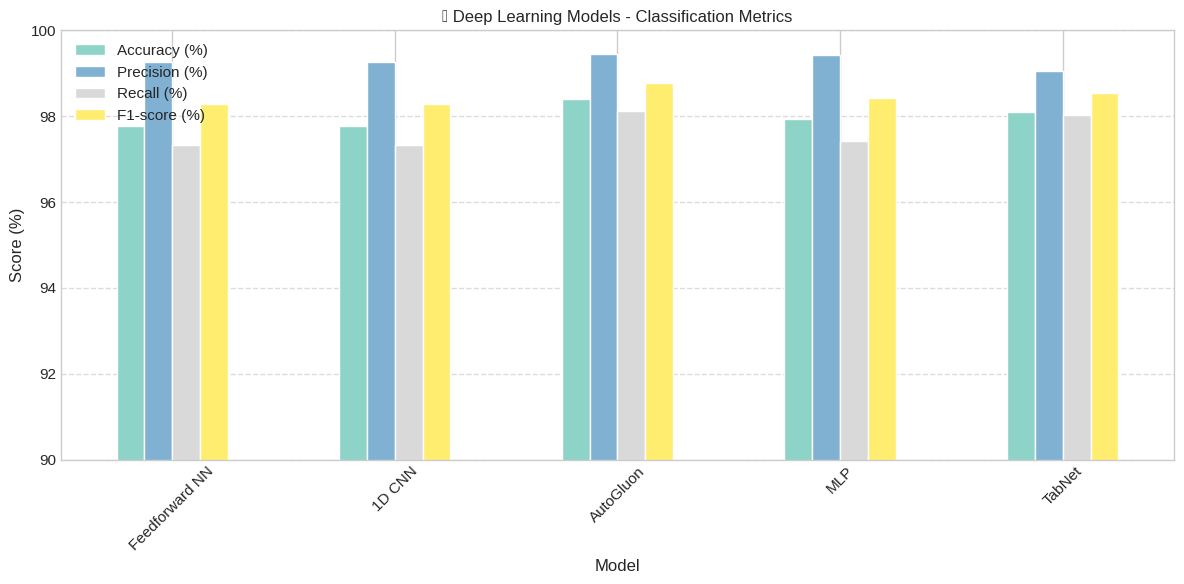

📋 Deep Learning Models - Evaluation Metrics (from Confusion Matrix):

         Model  Accuracy (%)  Precision (%)  Recall (%)  F1-score (%)
Feedforward NN         97.77          99.27       97.32         98.29
        1D CNN         97.77          99.27       97.32         98.29
     AutoGluon         98.40          99.45       98.11         98.78
           MLP         97.94          99.43       97.43         98.42
        TabNet         98.09          99.06       98.02         98.54


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Confusion matrix values in format: [TN, FP, FN, TP]
conf_matrices = {
    "Feedforward NN": [12807, 178, 668, 24292],
    "1D CNN":         [12807, 178, 668, 24292],
    "AutoGluon":      [12850, 135, 471, 24489],
    "MLP":            [12845, 140, 642, 24318],
    "TabNet":         [12754, 231, 493, 24467]
}

# Function to calculate metrics from confusion matrix
def calculate_metrics(TN, FP, FN, TP):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * precision * recall / (precision + recall)
    return accuracy, precision, recall, f1_score

# Prepare dataframe
data = {
    "Model": [],
    "Accuracy (%)": [],
    "Precision (%)": [],
    "Recall (%)": [],
    "F1-score (%)": []
}

# Compute metrics for each model
for model, (TN, FP, FN, TP) in conf_matrices.items():
    acc, prec, rec, f1 = calculate_metrics(TN, FP, FN, TP)
    data["Model"].append(model)
    data["Accuracy (%)"].append(round(acc * 100, 2))
    data["Precision (%)"].append(round(prec * 100, 2))
    data["Recall (%)"].append(round(rec * 100, 2))
    data["F1-score (%)"].append(round(f1 * 100, 2))

# Create DataFrame
df_metrics = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))
df_metrics.set_index("Model").plot(kind="bar", figsize=(12, 6), colormap='Set3')
plt.title("📊 Deep Learning Models - Classification Metrics")
plt.ylabel("Score (%)")
plt.ylim(90, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print DataFrame
print("📋 Deep Learning Models - Evaluation Metrics (from Confusion Matrix):\n")
print(df_metrics.to_string(index=False))


✅ Best model based on F1-score:
Model            AutoGluon
Accuracy (%)          98.4
Precision (%)        99.45
Recall (%)           98.11
F1-score (%)         98.78
AUC-ROC (%)            NaN
Name: 2, dtype: object

🏆 Best model based on AUC-ROC:
Model            XGBoost
Accuracy (%)       98.41
Precision (%)      99.36
Recall (%)         98.21
F1-score (%)       98.78
AUC-ROC (%)        99.83
Name: 9, dtype: object



<ipython-input-111-2680be5108f4>:48: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


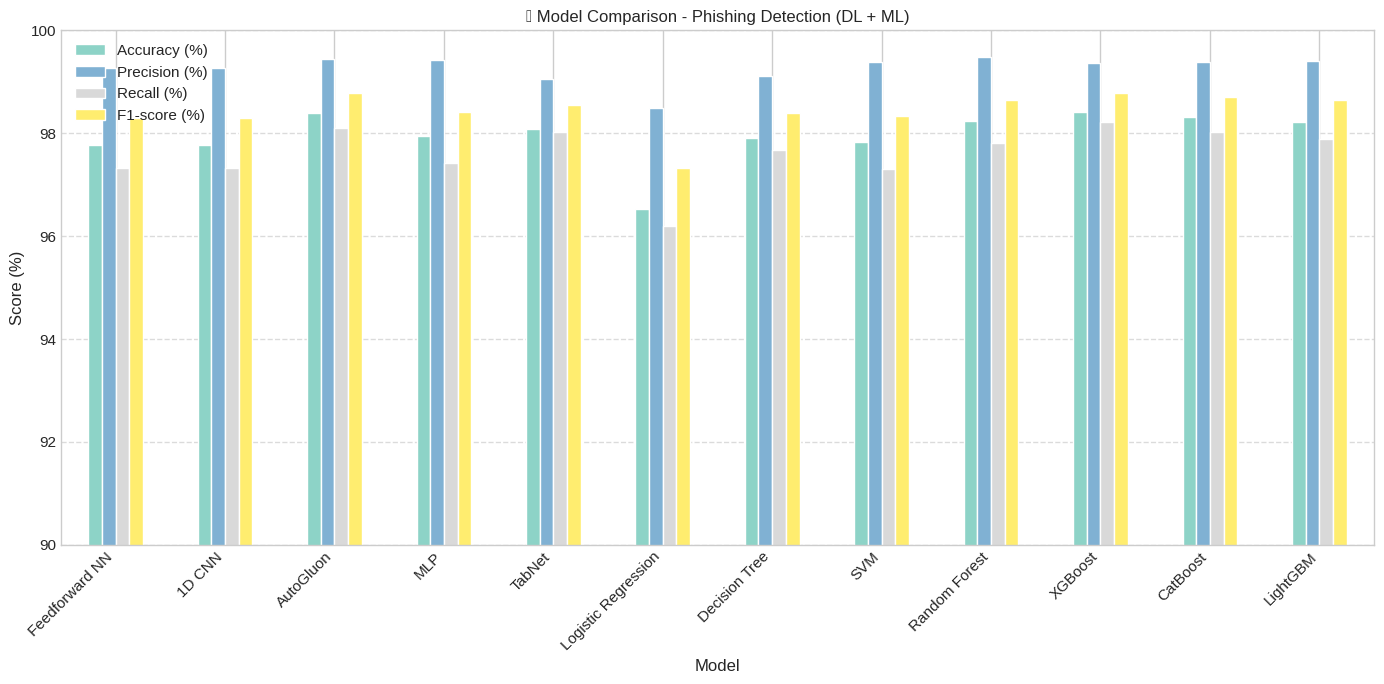

<ipython-input-111-2680be5108f4>:59: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


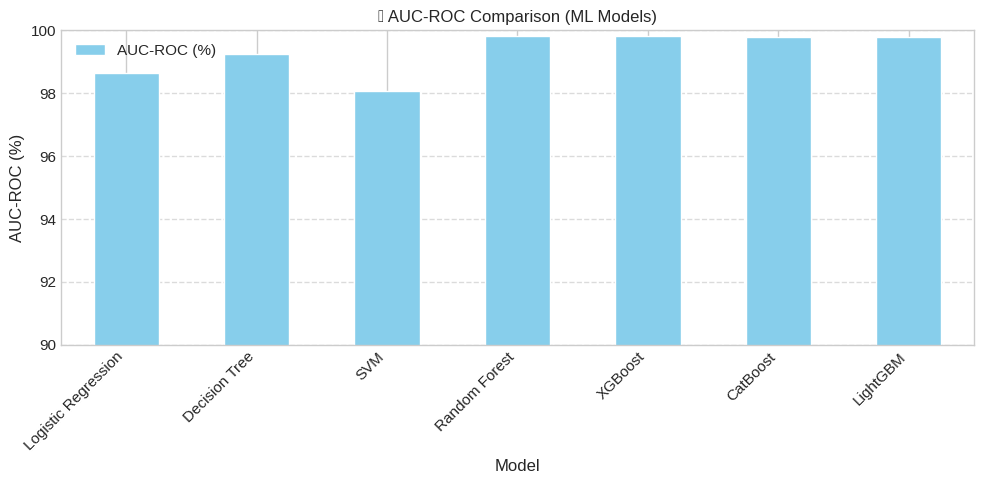

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# All models and their performance metrics (rounded to 2 decimal places)
data = [
    # Deep Learning Models
    ["Feedforward NN", 97.77, 99.27, 97.32, 98.29, None],
    ["1D CNN",         97.77, 99.27, 97.32, 98.29, None],
    ["AutoGluon",      98.40, 99.45, 98.11, 98.78, None],
    ["MLP",            97.94, 99.43, 97.43, 98.42, None],
    ["TabNet",         98.09, 99.06, 98.02, 98.54, None],

    # ML Models
    ["Logistic Regression", 96.53, 98.50, 96.19, 97.33, 98.63],
    ["Decision Tree",       97.90, 99.11, 97.68, 98.39, 99.26],
    ["SVM",                 97.83, 99.38, 97.31, 98.33, 98.07],
    ["Random Forest",       98.23, 99.49, 97.81, 98.64, 99.81],
    ["XGBoost",             98.41, 99.36, 98.21, 98.78, 99.83],
    ["CatBoost",            98.31, 99.38, 98.03, 98.70, 99.80],
    ["LightGBM",            98.22, 99.40, 97.89, 98.64, 99.80],
]

# Create DataFrame
columns = ["Model", "Accuracy (%)", "Precision (%)", "Recall (%)", "F1-score (%)", "AUC-ROC (%)"]
df_all = pd.DataFrame(data, columns=columns)

# Find the best model based on highest F1-score or AUC-ROC
best_f1_model = df_all.loc[df_all["F1-score (%)"].idxmax()]
best_auc_model = df_all[df_all["AUC-ROC (%)"].notna()].loc[df_all["AUC-ROC (%)"].idxmax()]

print("✅ Best model based on F1-score:")
print(best_f1_model, end="\n\n")

print("🏆 Best model based on AUC-ROC:")
print(best_auc_model, end="\n\n")

# Visualization
metrics = ["Accuracy (%)", "Precision (%)", "Recall (%)", "F1-score (%)"]
df_all.set_index("Model", inplace=True)

# Plot all metrics except AUC first
df_all[metrics].plot(kind="bar", figsize=(14, 7), colormap="Set3")
plt.title("📊 Model Comparison - Phishing Detection (DL + ML)")
plt.ylabel("Score (%)")
plt.xticks(rotation=45, ha='right')
plt.ylim(90, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot AUC-ROC separately
df_auc = df_all[df_all["AUC-ROC (%)"].notna()][["AUC-ROC (%)"]]
df_auc.plot(kind="bar", figsize=(10, 5), color="skyblue")
plt.title("🔵 AUC-ROC Comparison (ML Models)")
plt.ylabel("AUC-ROC (%)")
plt.xticks(rotation=45, ha='right')
plt.ylim(90, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


                  Model  Accuracy  Precision  Recall  F1-score  AUC-ROC
0               XGBoost     98.41      99.36   98.21     98.78    99.83
1             AutoGluon     98.40      99.45   98.11     98.78      NaN
2              CatBoost     98.31      99.38   98.03     98.70    99.80
3              LightGBM     98.22      99.40   97.89     98.64    99.80
4         Random Forest     98.23      99.49   97.81     98.64    99.81
5                TabNet     98.09      99.06   98.02     98.54      NaN
6                   MLP     97.94      99.43   97.43     98.42      NaN
7         Decision Tree     97.90      99.11   97.68     98.39    99.26
8                   SVM     97.83      99.38   97.31     98.33    98.07
9        Feedforward NN     97.77      99.27   97.32     98.29      NaN
10               1D CNN     97.77      99.27   97.32     98.29      NaN
11  Logistic Regression     96.53      98.50   96.19     97.33    98.63


<ipython-input-112-39187fac6f07>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Model", y="F1-score", palette="viridis")


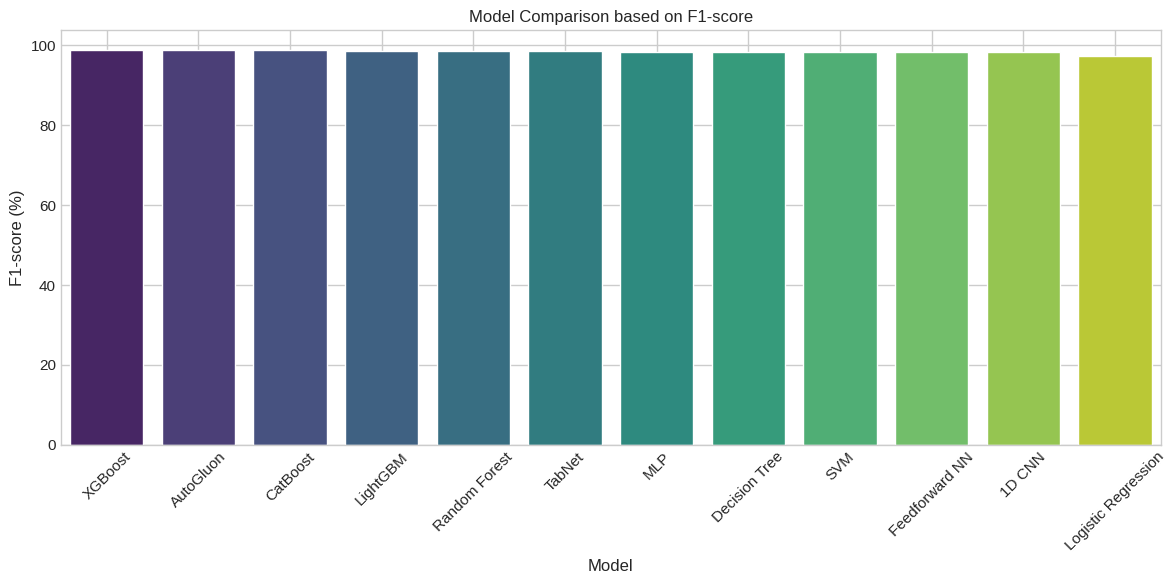

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data: Add all models with metrics
model_metrics = [
    {"Model": "XGBoost", "Accuracy": 98.41, "Precision": 99.36, "Recall": 98.21, "F1-score": 98.78, "AUC-ROC": 99.83},
    {"Model": "AutoGluon", "Accuracy": 98.40, "Precision": 99.45, "Recall": 98.11, "F1-score": 98.78, "AUC-ROC": None},
    {"Model": "CatBoost", "Accuracy": 98.31, "Precision": 99.38, "Recall": 98.03, "F1-score": 98.70, "AUC-ROC": 99.80},
    {"Model": "LightGBM", "Accuracy": 98.22, "Precision": 99.40, "Recall": 97.89, "F1-score": 98.64, "AUC-ROC": 99.80},
    {"Model": "Random Forest", "Accuracy": 98.23, "Precision": 99.49, "Recall": 97.81, "F1-score": 98.64, "AUC-ROC": 99.81},
    {"Model": "TabNet", "Accuracy": 98.09, "Precision": 99.06, "Recall": 98.02, "F1-score": 98.54, "AUC-ROC": None},
    {"Model": "MLP", "Accuracy": 97.94, "Precision": 99.43, "Recall": 97.43, "F1-score": 98.42, "AUC-ROC": None},
    {"Model": "Decision Tree", "Accuracy": 97.90, "Precision": 99.11, "Recall": 97.68, "F1-score": 98.39, "AUC-ROC": 99.26},
    {"Model": "SVM", "Accuracy": 97.83, "Precision": 99.38, "Recall": 97.31, "F1-score": 98.33, "AUC-ROC": 98.07},
    {"Model": "Feedforward NN", "Accuracy": 97.77, "Precision": 99.27, "Recall": 97.32, "F1-score": 98.29, "AUC-ROC": None},
    {"Model": "1D CNN", "Accuracy": 97.77, "Precision": 99.27, "Recall": 97.32, "F1-score": 98.29, "AUC-ROC": None},
    {"Model": "Logistic Regression", "Accuracy": 96.53, "Precision": 98.50, "Recall": 96.19, "F1-score": 97.33, "AUC-ROC": 98.63},
]

# Convert to DataFrame
df = pd.DataFrame(model_metrics)

# Sort by F1-score descending
df_sorted = df.sort_values(by="F1-score", ascending=False)

# Display sorted table
print(df_sorted)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="Model", y="F1-score", palette="viridis")
plt.title("Model Comparison based on F1-score")
plt.ylabel("F1-score (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()
